In [41]:
import pandas as pd
from tnseq2.src.analysis import *
from pathlib import Path
import plotnine as p9
import seaborn as sns

root = "/Users/ansintsova/git_repos/nguyenb_tnseq/data/13_04_results"
counts = 'counts'
results = 'results'
control_file = Path(root)/'controls.txt'

import warnings
warnings.filterwarnings('ignore')

In [42]:
fres = pd.read_csv(Path(root)/results/"16_04_final_results_merged.csv")

In [43]:
# WT 

def cntrl_df(fdf, phenotype = 'wt'):
    wt = fdf[fdf.gene.isin([i for i in fdf.gene if phenotype in str(i)])]
    wt = wt[['gene', 'experiment', 'dnaid', 'd1_fitness_mean', 'd2_fitness_mean', 'd3_fitness_mean', 'd4_fitness_mean']].drop_duplicates()
    wt = wt.melt(id_vars=['gene', 'experiment', 'dnaid'],var_name = 'day', value_name='fitness')

    replace_map = {'d1_fitness_mean': 'Day 1', 
                      'd2_fitness_mean': 'Day 2',
                      'd3_fitness_mean': 'Day 3',
                      'd4_fitness_mean': 'Day 4'}
    wt = wt.replace({'day':replace_map})
    return wt


# Summarizing results across experiements:

## Experiments analyzed:


In [44]:
fres[['library', 'dnaid', 'experiment']].drop_duplicates().dropna().set_index('experiment').sort_index()

,library,dnaid
experiment,,
TV3371B,library_11_1,dnaid1315
TV3379,library_11_1,dnaid1315
TV3652B,library_15_1,dnaid1428
TV3652C,library_9_1,dnaid1429
TV4518,library_11_2,dnaid2019
TV4570,library_10_1,dnaid2015:dnaid2016
TV4592A,library_10_2,dnaid2017:dnaid2018
TV4592B,library_14_2,dnaid2017:dnaid2018
TV5490A,library_13_1,dnaid2023:dnaid2024


Number of genes: 3072
891


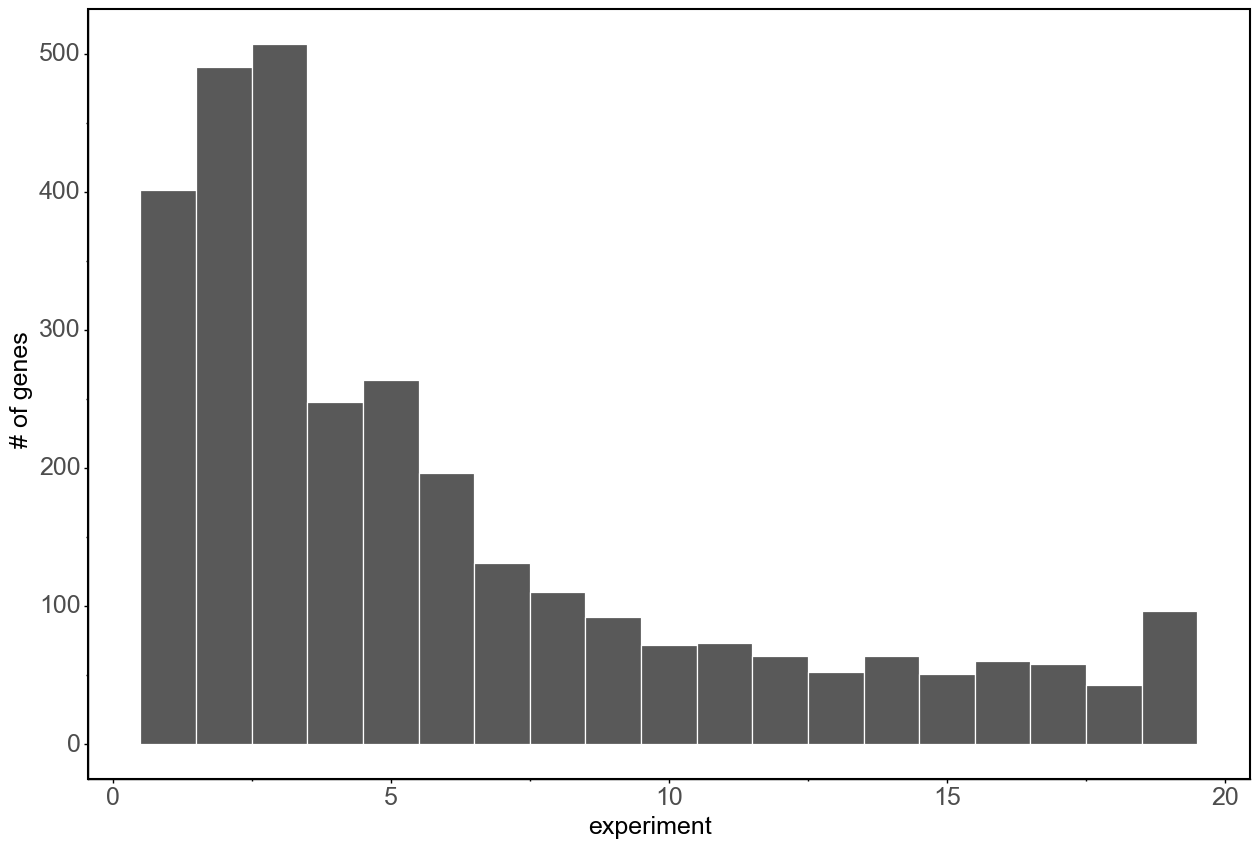

<ggplot: (8791017604735)>

In [116]:
print(f"Number of genes: {fres.dropna(subset=['locus']).gene.nunique()}")

num_exp_per_gene = fres.dropna(subset=['locus'])[['gene', 'experiment']].drop_duplicates().groupby('gene').experiment.nunique().reset_index()
#num_exp_per_gene.experiment.hist(bins=70)
print(num_exp_per_gene[num_exp_per_gene.experiment <3].shape[0])
p9.options.figure_size = (15, 10)
p = p9.ggplot(num_exp_per_gene, p9.aes(x="experiment"))
(p + p9.geom_histogram(bins=19, color='white')
+ p9.theme_classic()
#+ p9.ggtitle("Number of experiments each gene was present (in the inoculum)\n")
+ p9.labs( y = '# of genes')
+ p9.theme(
    plot_title = p9.element_text(family = "Arial", size = 24, hjust = 0), # Title size and font.
    axis_text = p9.element_text(family = "Arial", size = 18), # Size and font of x and y values.
    axis_title = p9.element_text(family = "Arial", size = 18), # Size and font of x and y axes.
    panel_border = p9.element_rect(colour = "black", fill = np.nan, size = 1.5), # Black border around the plot area.
    axis_ticks = p9.element_line(colour = "black", size = 1), # Style of x and y ticks.
    legend_text = p9.element_text(family = "Arial", size = 18),
    strip_text = p9.element_text(family = "Arial", size = 18),
  ))



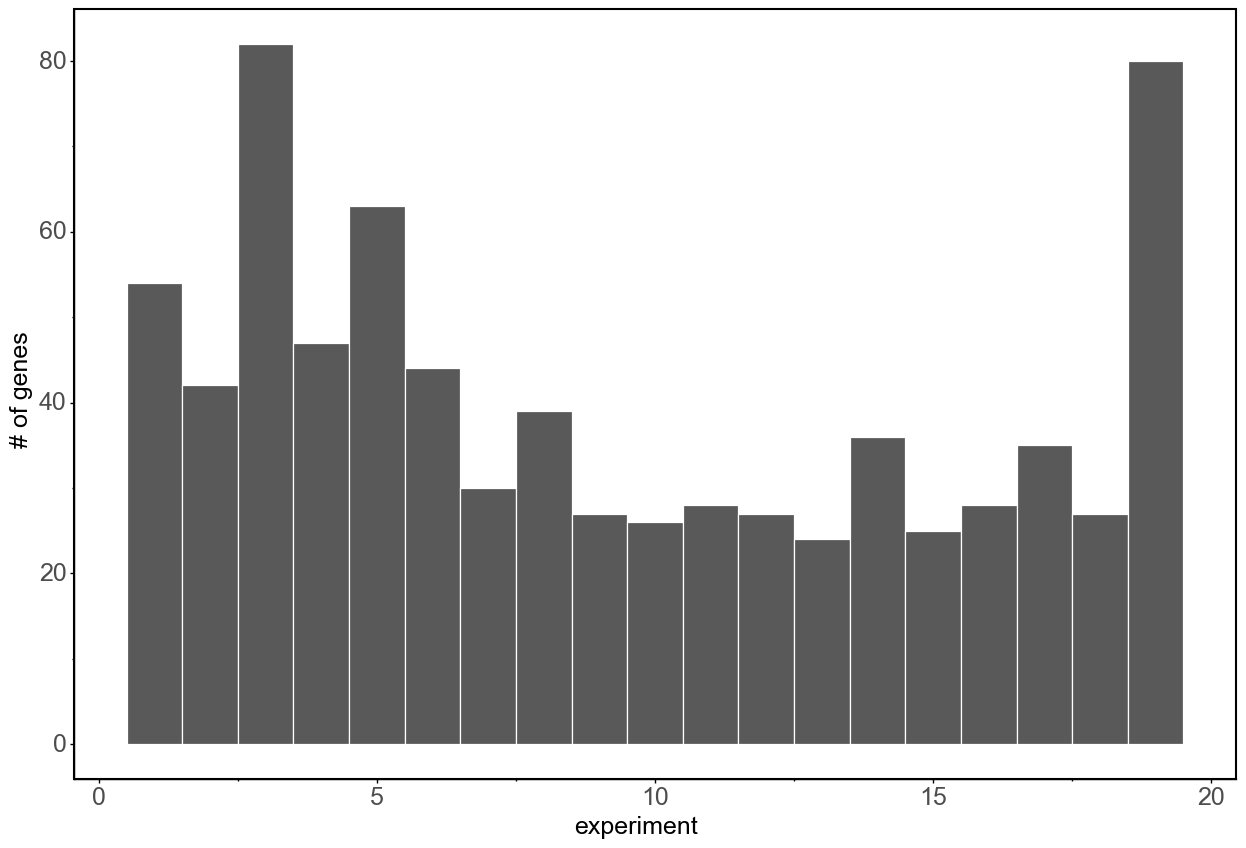

<ggplot: (-9223363245838521407)>

In [115]:
query_str = "d1_padj < 0.01 or d2_padj < 0.01 or d3_padj < 0.01 or d4_padj < 0.01"
#query_str = "d1_padj < 0.01 "#or d2_padj < 0.01 or d3_padj < 0.01 or d4_padj < 0.01"
hit_genes = fres.query(query_str).gene.values
num_exp_per_hit = fres.dropna(subset=['locus'])[fres.gene.isin(hit_genes)][['gene', 'experiment']].drop_duplicates().groupby('gene').experiment.nunique().reset_index()
p9.options.figure_size = (15, 10)
p = p9.ggplot(num_exp_per_hit, p9.aes(x="experiment"))
(p + p9.geom_histogram(bins=19, color='white')
+ p9.theme_classic()
#+ p9.ggtitle("Number of experiments each gene was present (in the inoculum)\n")
+ p9.labs( y = '# of genes')
+ p9.theme(
    plot_title = p9.element_text(family = "Arial", size = 24, hjust = 0), # Title size and font.
    axis_text = p9.element_text(family = "Arial", size = 18), # Size and font of x and y values.
    axis_title = p9.element_text(family = "Arial", size = 18), # Size and font of x and y axes.
    panel_border = p9.element_rect(colour = "black", fill = np.nan, size = 1.5), # Black border around the plot area.
    axis_ticks = p9.element_line(colour = "black", size = 1), # Style of x and y ticks.
    legend_text = p9.element_text(family = "Arial", size = 18),
    strip_text = p9.element_text(family = "Arial", size = 18),
  ))

In [95]:
num_exp_per_hit.sample(10)

,gene,experiment
309,feoA,5
719,yicI,6
674,yebC,5
398,leuO,19
73,SL1344_2801,9
626,traT,18
331,gatR,1
294,degQ,8
266,bigA,14
648,yadE,10


In [92]:
fres[fres.gene == 'yiiG'][['gene', 'experiment']].nunique()

gene           1
experiment    19
dtype: int64

In [87]:
dpi1

,gene,num_exp,num_sig,inoculum,cnt,phits
0,SL1344_0031,14,1.0,3991.0,3098.0,0.071429
1,SL1344_0099A,13,1.0,4477.0,2819.5,0.076923
2,SL1344_0338,19,1.0,2407.0,2113.0,0.052632
3,SL1344_0956,5,1.0,1635.5,1822.0,0.200000
4,SL1344_1194,6,2.0,2350.0,159.0,0.333333
...,...,...,...,...,...,...
224,yigL,6,1.0,2979.0,4204.5,0.166667
225,yihW,3,1.0,2670.0,262.0,0.333333
226,yiiG,19,2.0,3928.5,3634.0,0.105263
227,yjdB,11,2.0,4844.5,4517.5,0.181818


## WT strain fitness across experiments:

This graph shows (mean) fitness (log2FC over inoculum) for WT barcodes in each of the experiments. Each point represents mean fitness value for each of the mice in the experiment. Ideally, fitness value would be 0.  

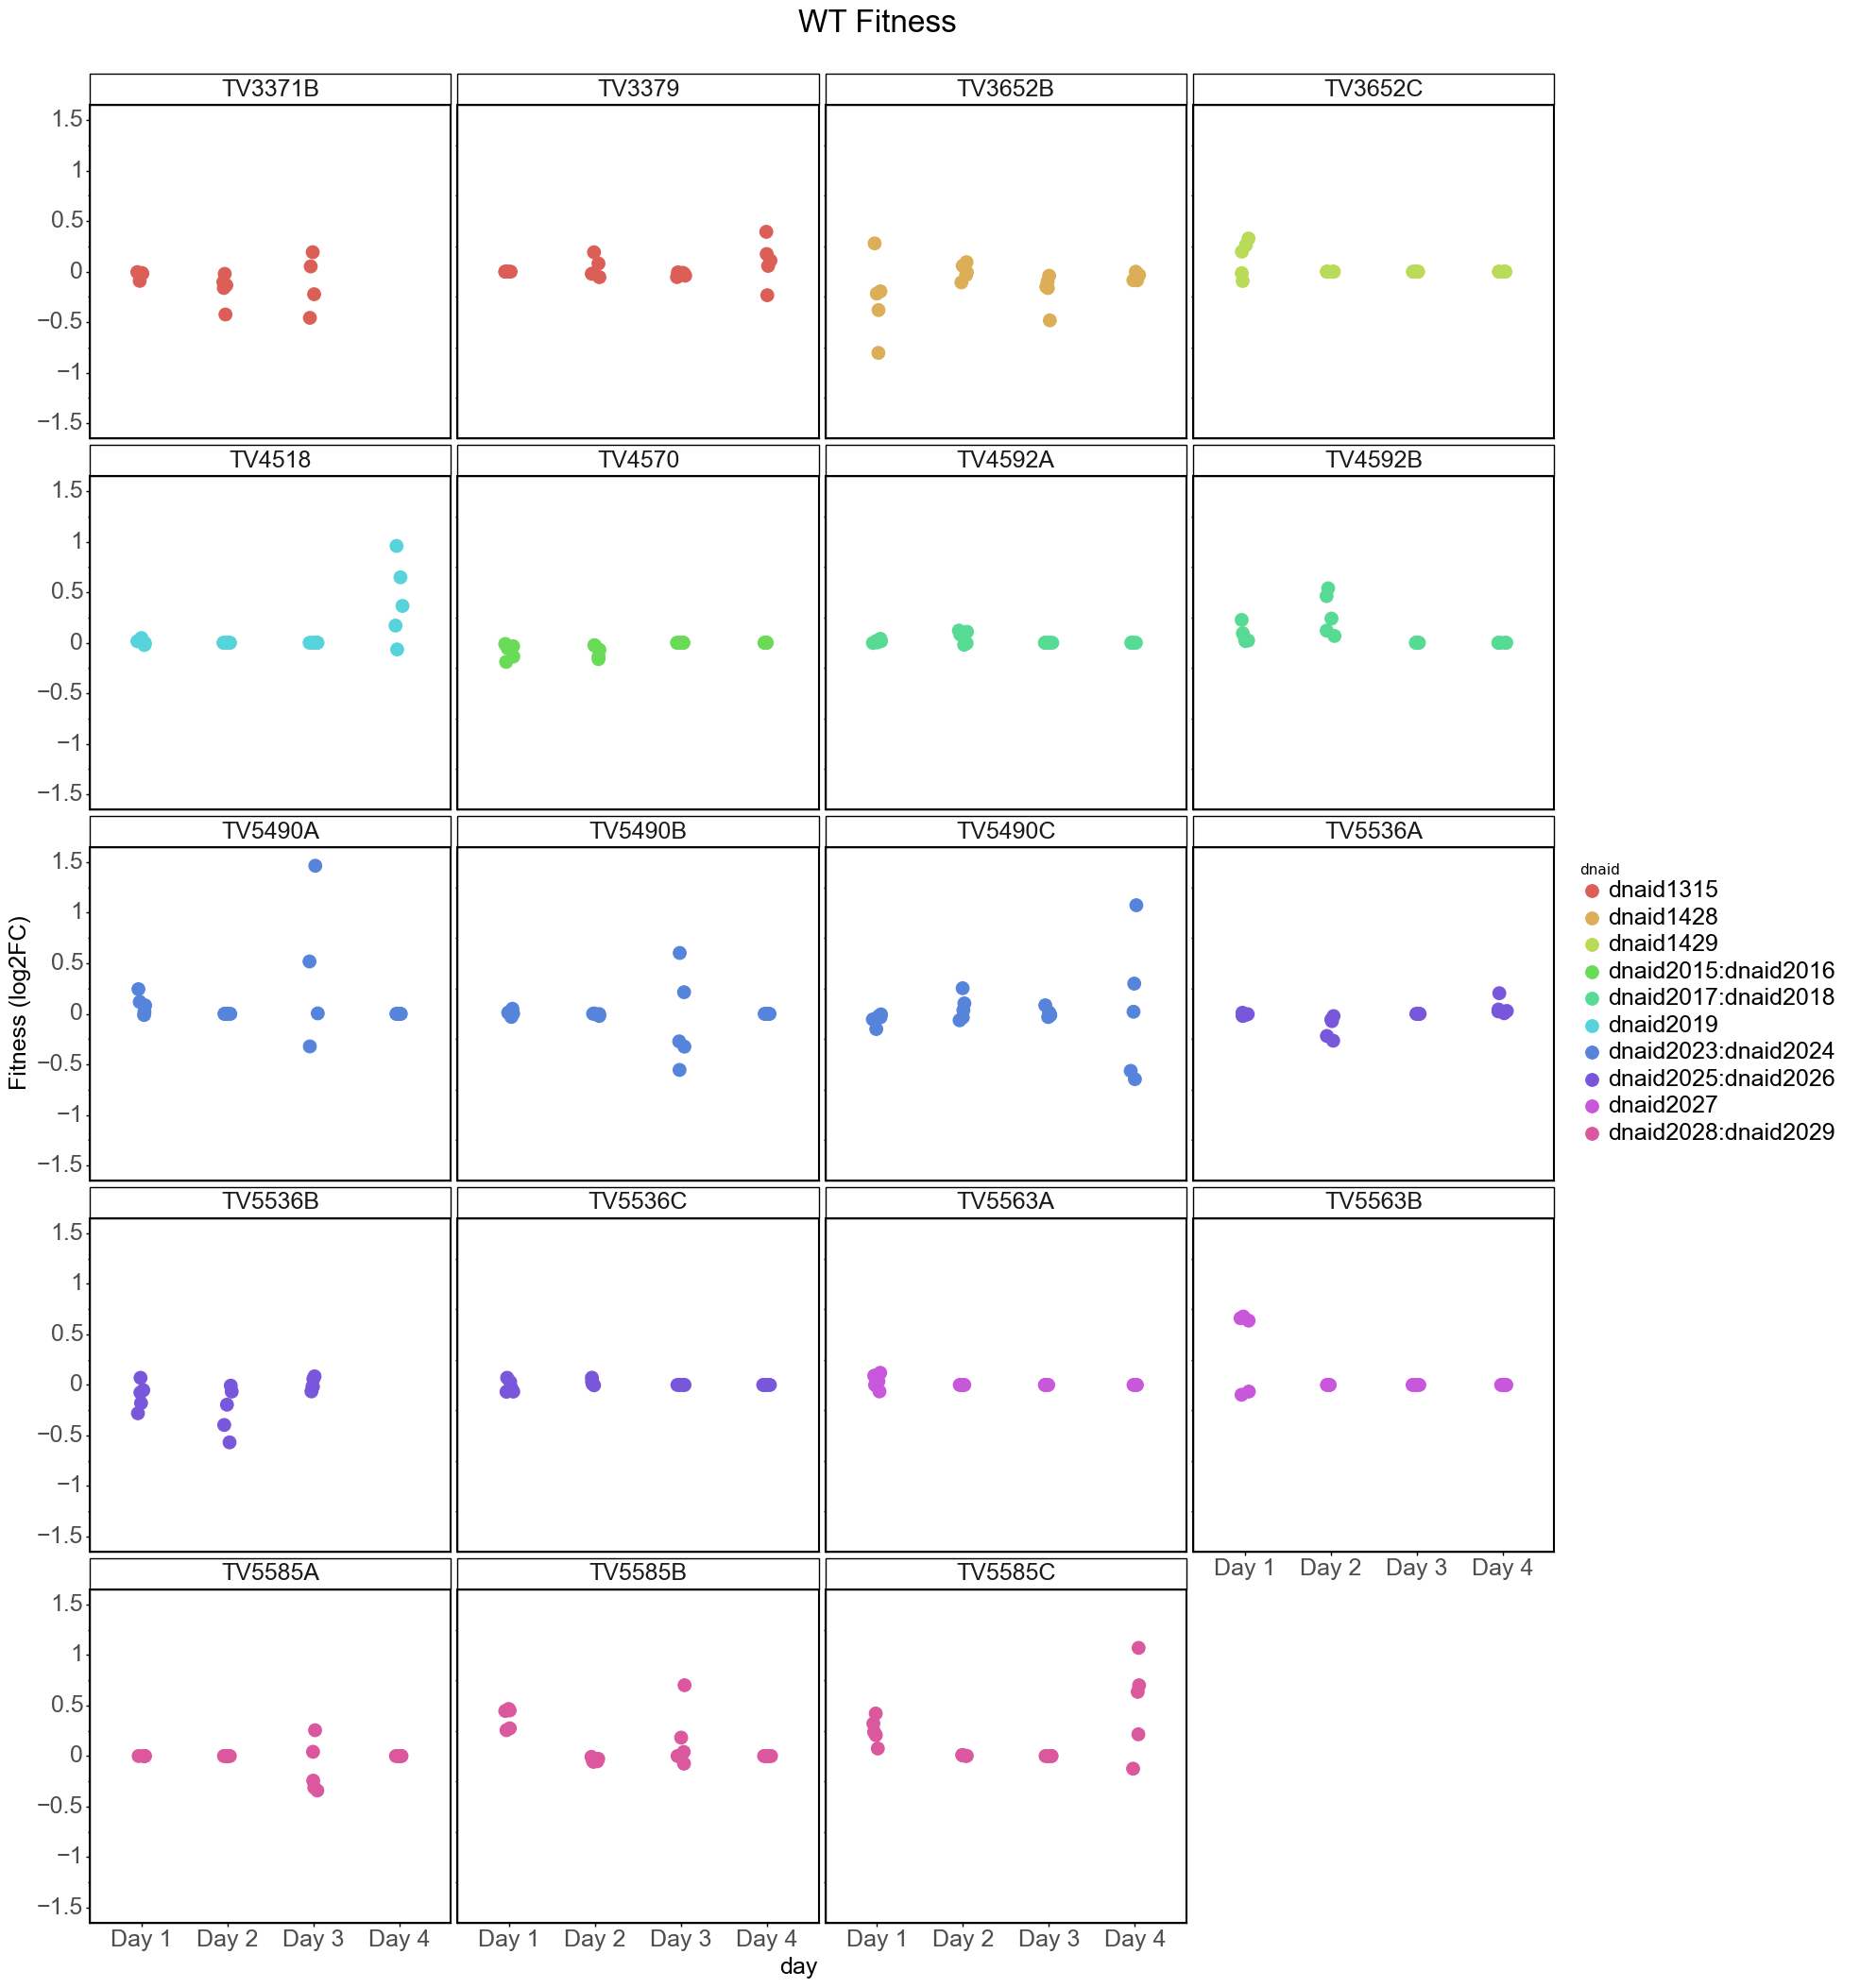

<ggplot: (-9223363245837756142)>

In [45]:
wt = cntrl_df(fres)
p9.options.figure_size = (20, 25)
p = p9.ggplot(p9.aes(x='day', y='fitness', color='dnaid'), wt)
(p + p9.geom_jitter(size=5, height=0, width=0.05) 
+ p9.theme_classic()
+ p9.ggtitle("WT Fitness\n")
+ p9.labs( y = 'Fitness (log2FC)')
+ p9.theme(
    plot_title = p9.element_text(family = "Arial", size = 24, hjust = 0), # Title size and font.
    axis_text = p9.element_text(family = "Arial", size = 18), # Size and font of x and y values.
    axis_title = p9.element_text(family = "Arial", size = 18), # Size and font of x and y axes.
    panel_border = p9.element_rect(colour = "black", fill = np.nan, size = 1.5), # Black border around the plot area.
    axis_ticks = p9.element_line(colour = "black", size = 1), # Style of x and y ticks.
    legend_text = p9.element_text(family = "Arial", size = 18),
    strip_text = p9.element_text(family = "Arial", size = 18),
  )
+ p9.scale_y_continuous(breaks=[-1.5, -1, -0.5, 0, 0.5, 1, 1.5], limits=[-1.5, 1.5])
+ p9.facet_wrap('~ experiment', ncol=4))

## hyb controls fitness across experiments:

This graph shows fitness (log2FC over inoculum) for hyb barcodes in each of the experiments. 

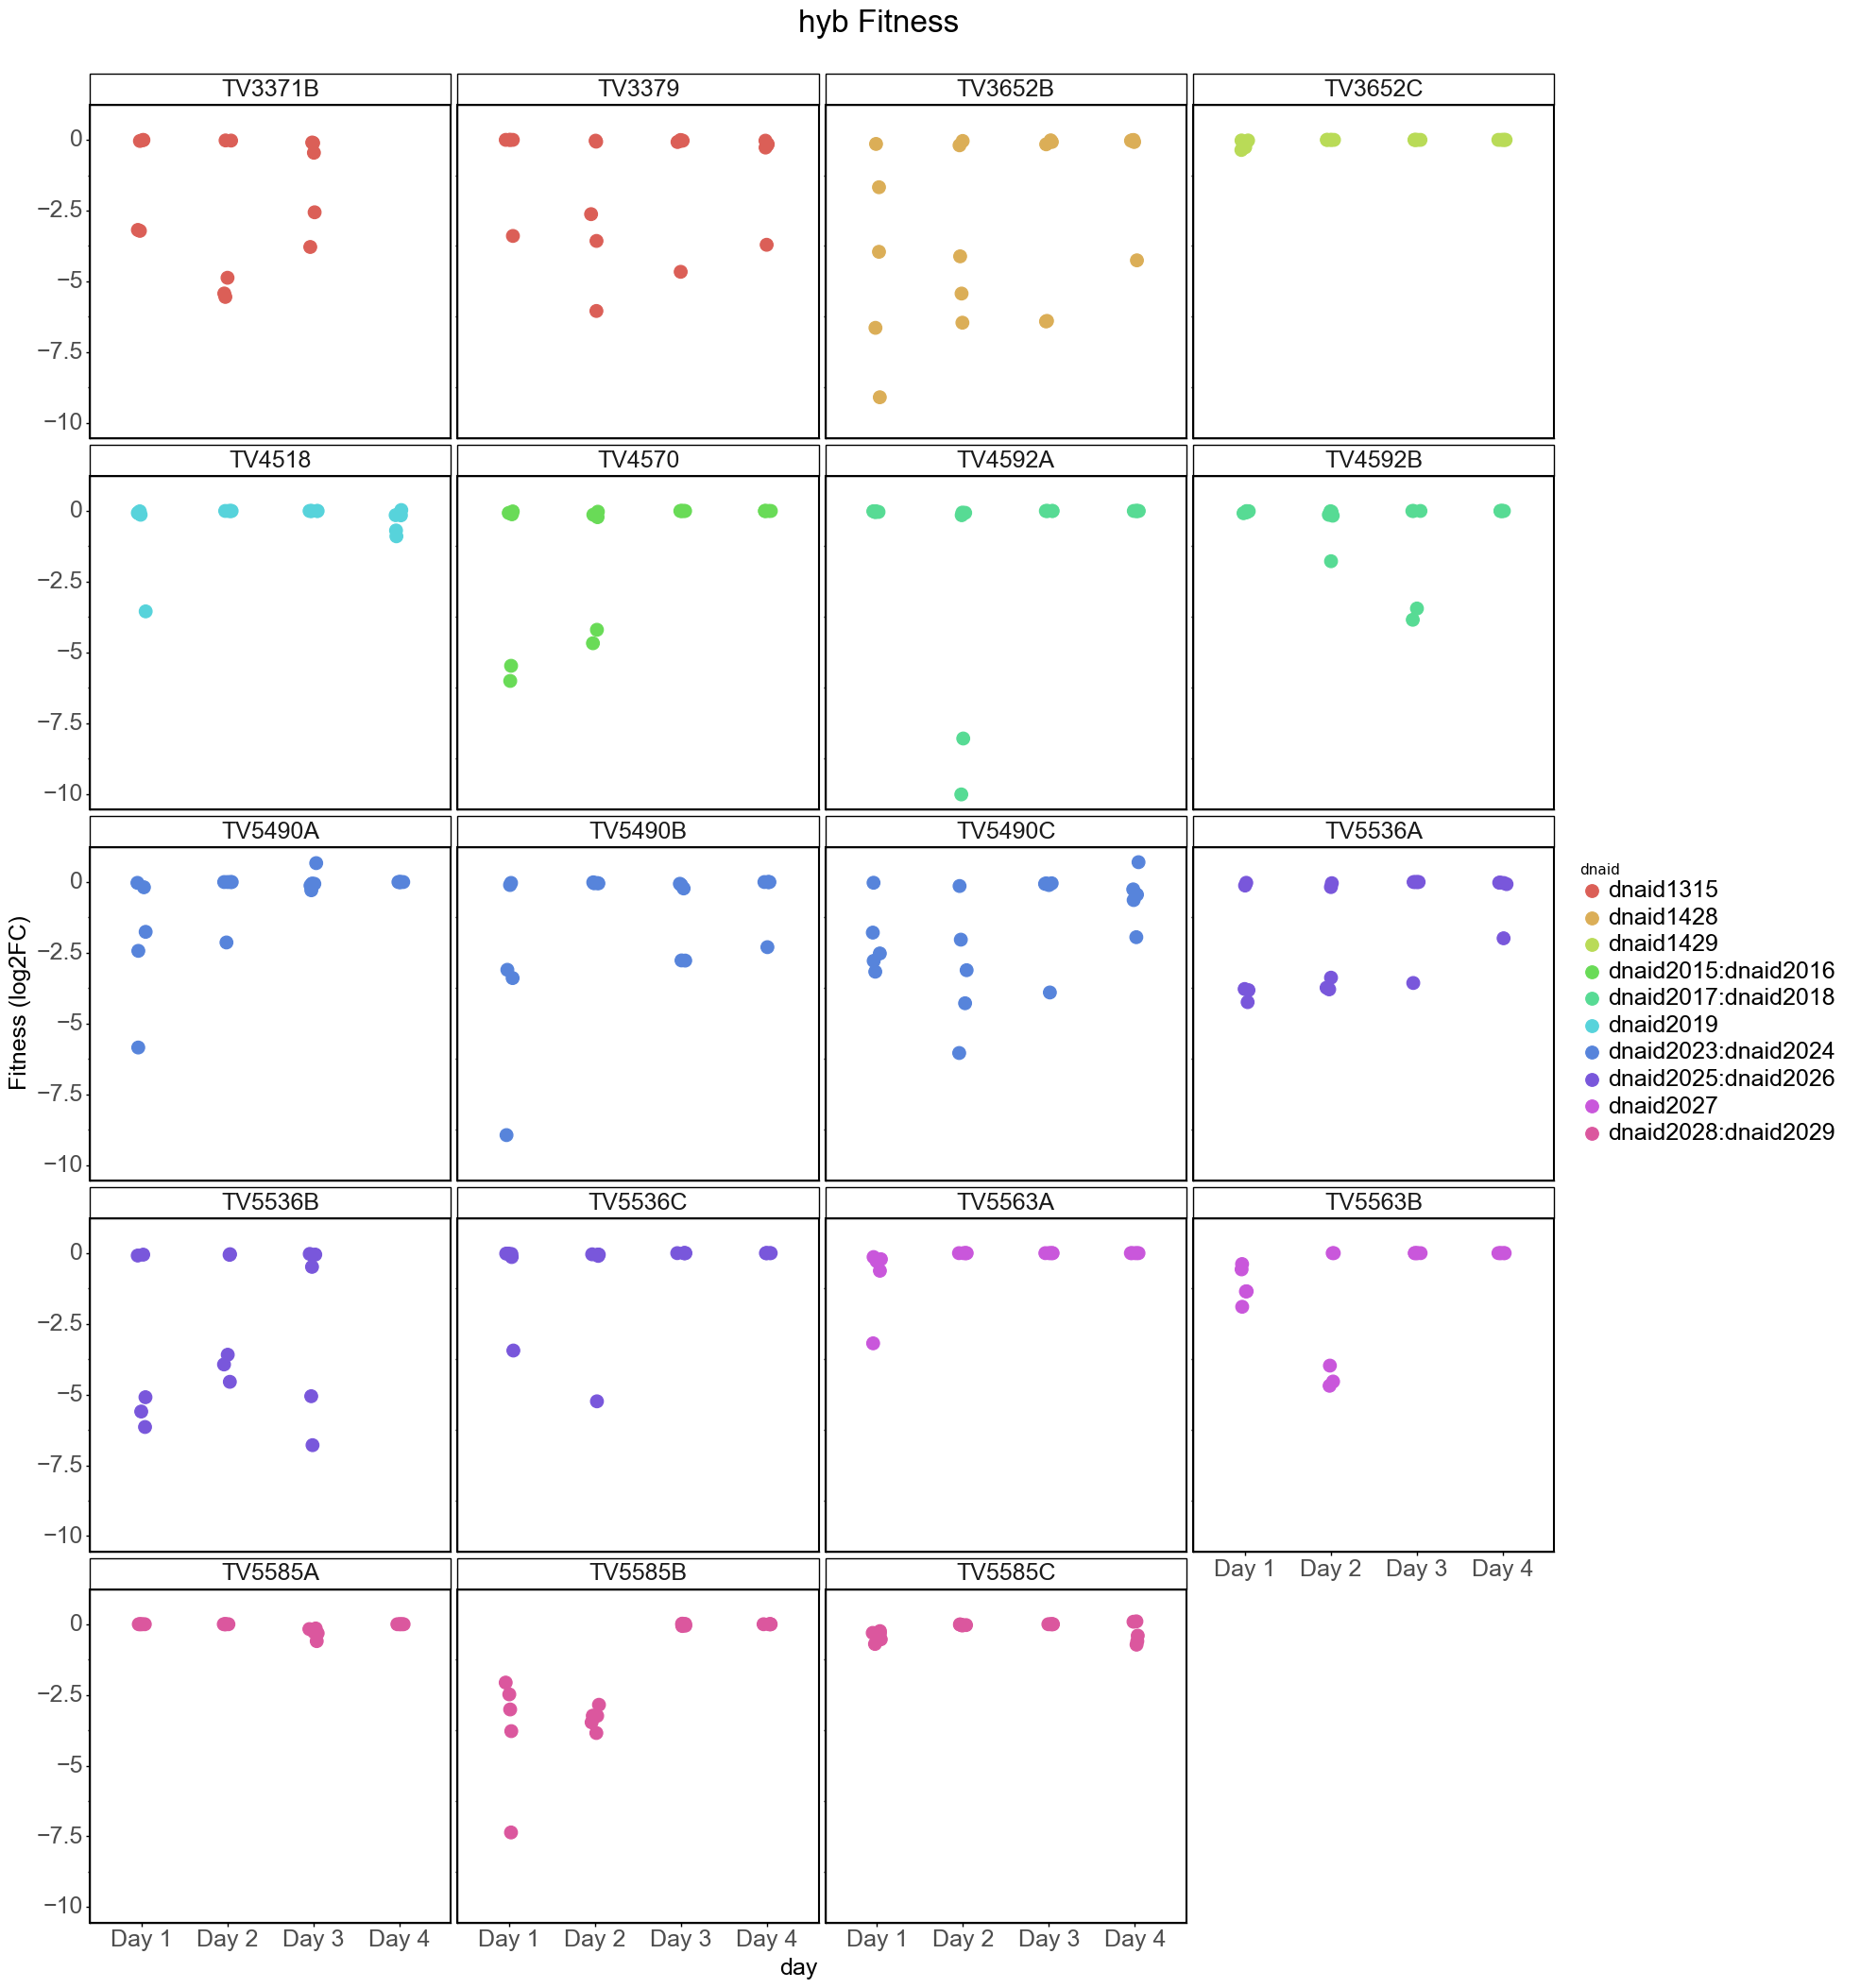

<ggplot: (8791021624107)>

In [46]:
hyb = cntrl_df(fres, 'hyb-')
p9.options.figure_size = (20, 25)
p = p9.ggplot(p9.aes(x='day', y='fitness', color='dnaid'), hyb)
(p + p9.geom_jitter(size=5, height=0, width=0.05) 
+ p9.theme_classic()
+ p9.ggtitle("hyb Fitness\n")
+ p9.labs( y = 'Fitness (log2FC)')
+ p9.theme(
    plot_title = p9.element_text(family = "Arial", size = 24, hjust = 0), # Title size and font.
    axis_text = p9.element_text(family = "Arial", size = 18), # Size and font of x and y values.
    axis_title = p9.element_text(family = "Arial", size = 18), # Size and font of x and y axes.
    panel_border = p9.element_rect(colour = "black", fill = np.nan, size = 1.5), # Black border around the plot area.
    axis_ticks = p9.element_line(colour = "black", size = 1), # Style of x and y ticks.
    legend_text = p9.element_text(family = "Arial", size = 18),
    strip_text = p9.element_text(family = "Arial", size = 18),
  )
#+ p9.scale_y_continuous(breaks=[-1.5, -1, -0.5, 0, 0.5, 1, 1.5], limits=[-1.5, 1.5])
+ p9.facet_wrap('~ experiment', ncol=4))

## chey controls fitness across experiments:

This graph shows fitness (log2FC over inoculum) for chey barcodes in each of the experiments. 

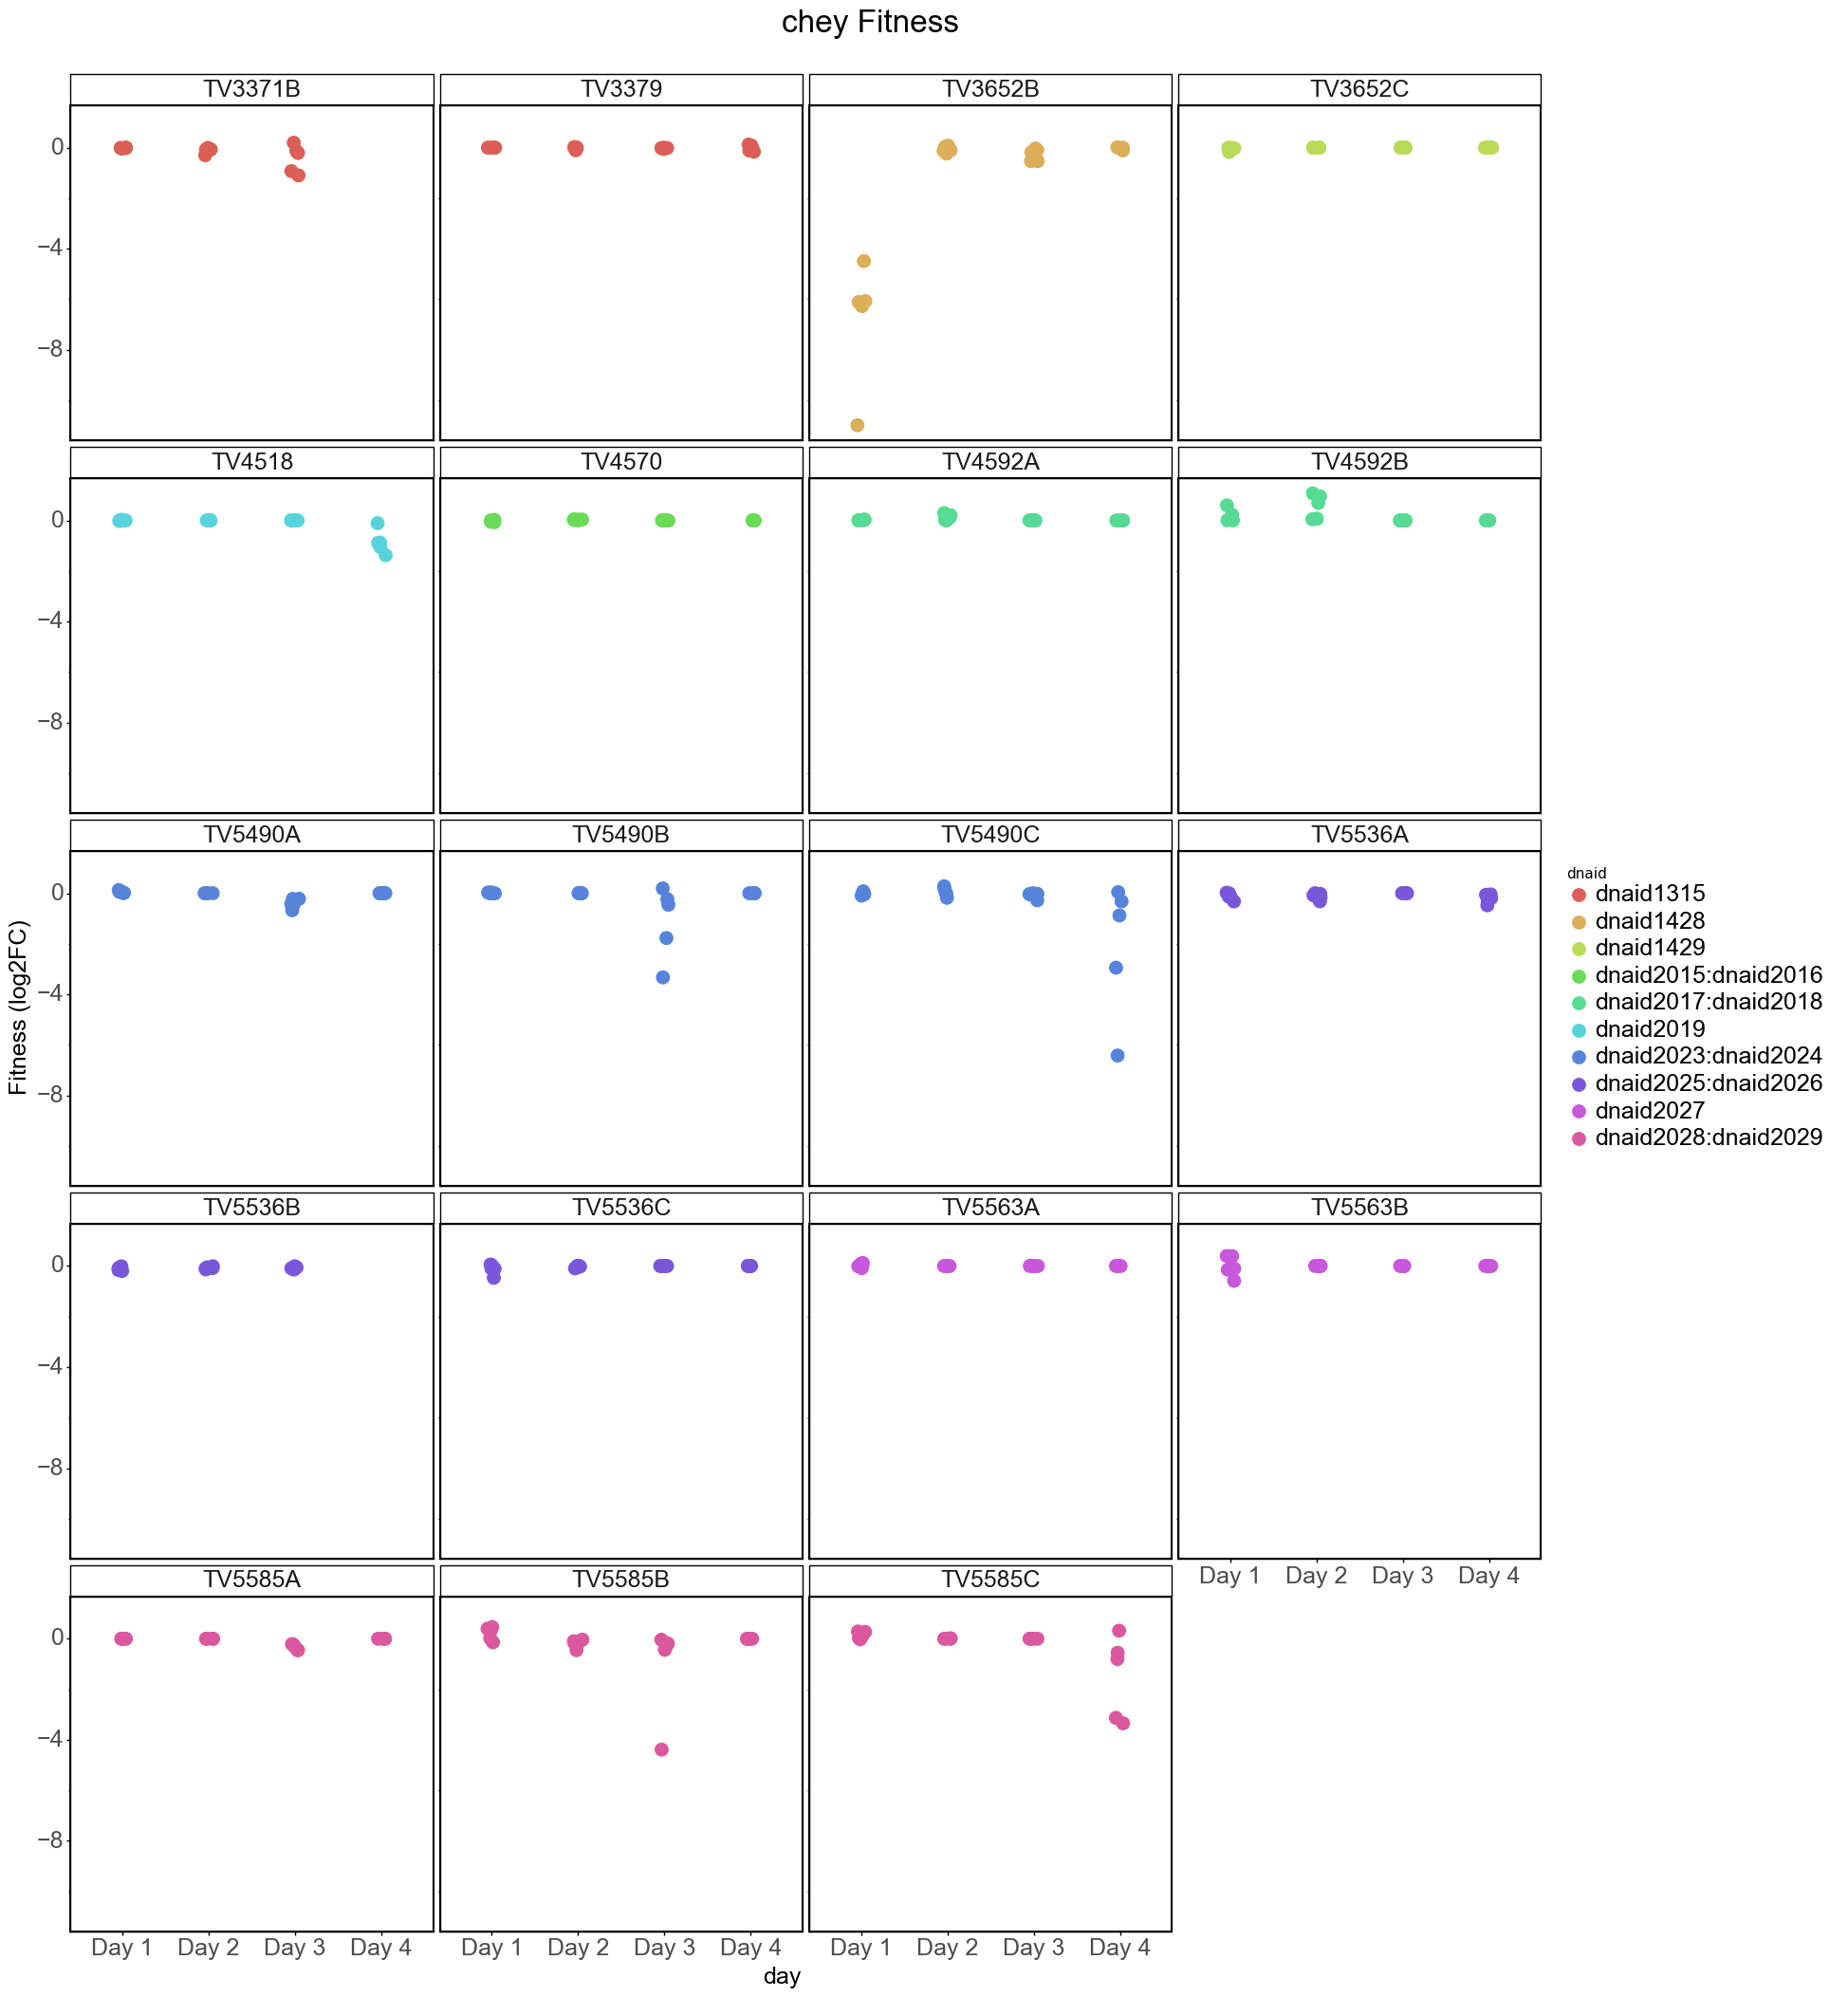

<ggplot: (-9223363245838421858)>

In [47]:
chey = cntrl_df(fres, 'chey-')
p9.options.figure_size = (20, 25)
p = p9.ggplot(p9.aes(x='day', y='fitness', color='dnaid'), chey)
(p + p9.geom_jitter(size=5, height=0, width=0.05) 
+ p9.theme_classic()
+ p9.ggtitle("chey Fitness\n")
+ p9.labs( y = 'Fitness (log2FC)')
+ p9.theme(
    plot_title = p9.element_text(family = "Arial", size = 24, hjust = 0), # Title size and font.
    axis_text = p9.element_text(family = "Arial", size = 18), # Size and font of x and y values.
    axis_title = p9.element_text(family = "Arial", size = 18), # Size and font of x and y axes.
    panel_border = p9.element_rect(colour = "black", fill = np.nan, size = 1.5), # Black border around the plot area.
    axis_ticks = p9.element_line(colour = "black", size = 1), # Style of x and y ticks.
    legend_text = p9.element_text(family = "Arial", size = 18),
    strip_text = p9.element_text(family = "Arial", size = 18),
  )
#+ p9.scale_y_continuous(breaks=[-1.5, -1, -0.5, 0, 0.5, 1, 1.5], limits=[-1.5, 1.5])
+ p9.facet_wrap('~ experiment', ncol=4))

## ssaV_invG controls fitness across experiments:

This graph shows fitness (log2FC over inoculum) for ssaV control barcodes in each of the experiments. 

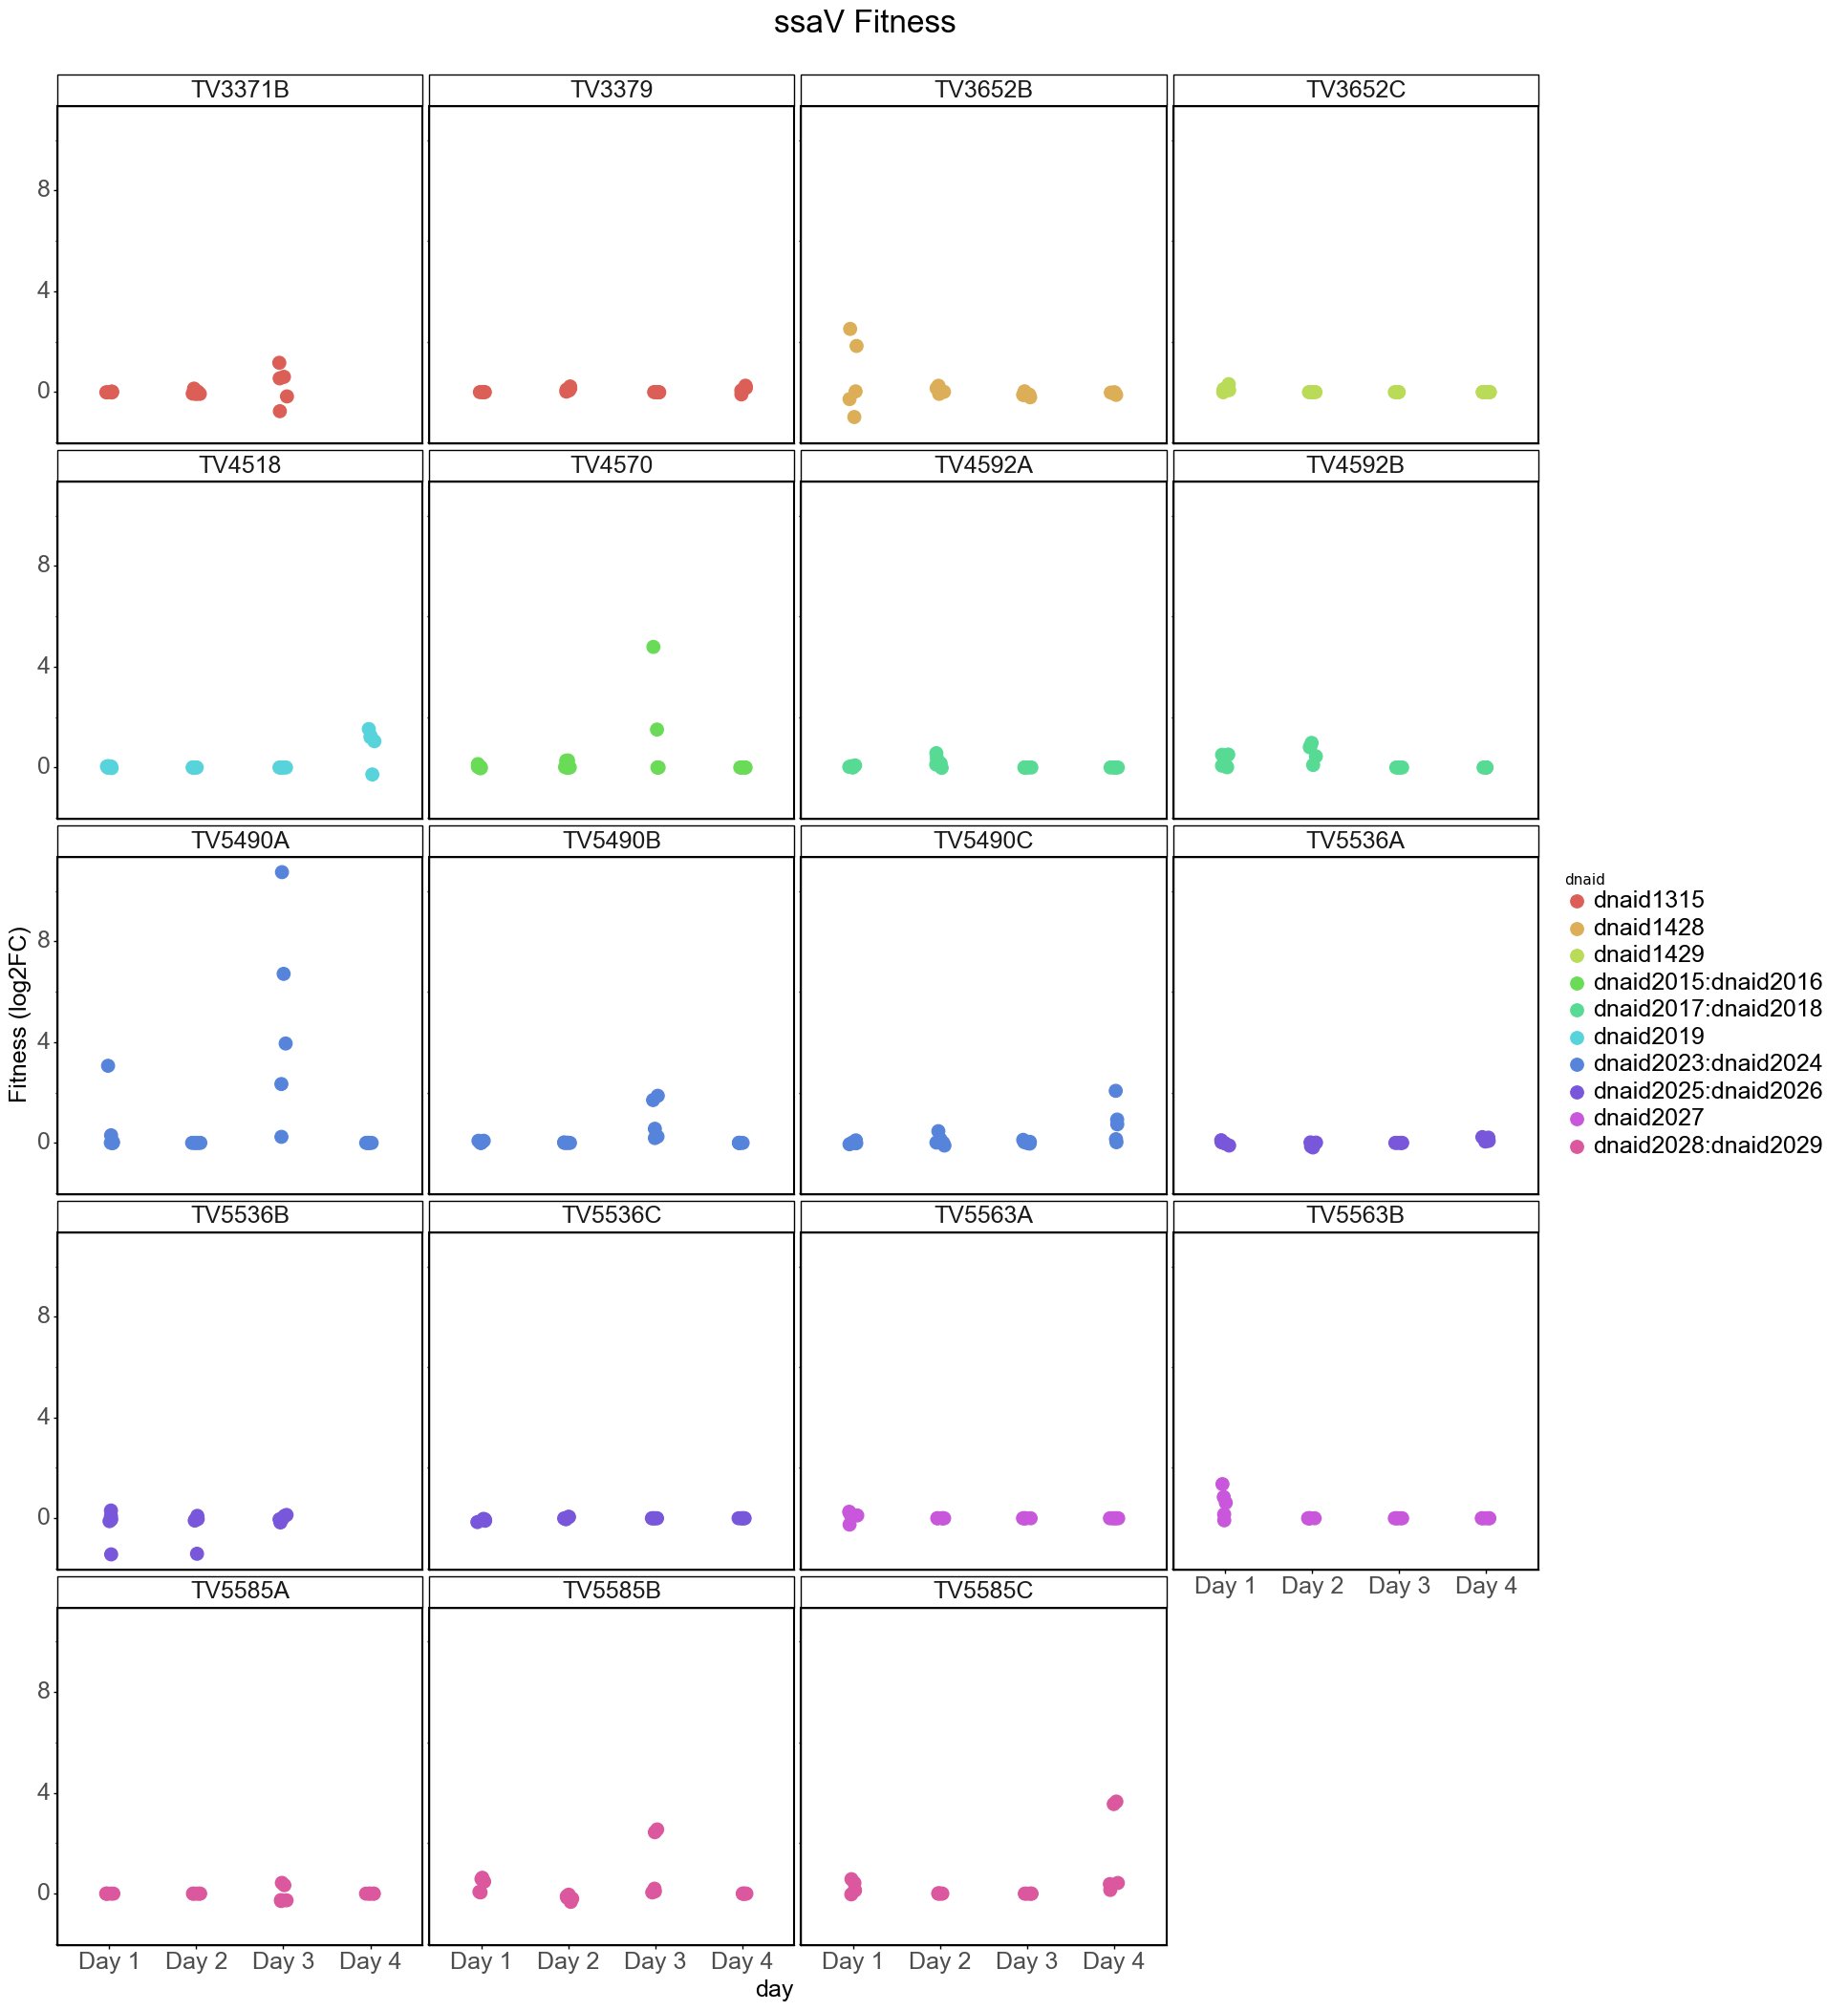

<ggplot: (-9223363245838602906)>

In [49]:
ssa = cntrl_df(fres, 'ssaV_')
p9.options.figure_size = (20, 25)
p = p9.ggplot(p9.aes(x='day', y='fitness', color='dnaid'), ssa)
(p + p9.geom_jitter(size=5, height=0, width=0.05) 
+ p9.theme_classic()
+ p9.ggtitle("ssaV Fitness\n")
+ p9.labs( y = 'Fitness (log2FC)')
+ p9.theme(
    plot_title = p9.element_text(family = "Arial", size = 24, hjust = 0), # Title size and font.
    axis_text = p9.element_text(family = "Arial", size = 18), # Size and font of x and y values.
    axis_title = p9.element_text(family = "Arial", size = 18), # Size and font of x and y axes.
    panel_border = p9.element_rect(colour = "black", fill = np.nan, size = 1.5), # Black border around the plot area.
    axis_ticks = p9.element_line(colour = "black", size = 1), # Style of x and y ticks.
    legend_text = p9.element_text(family = "Arial", size = 18),
    strip_text = p9.element_text(family = "Arial", size = 18),
  )
#+ p9.scale_y_continuous(breaks=[-1.5, -1, -0.5, 0, 0.5, 1, 1.5], limits=[-1.5, 1.5])
+ p9.facet_wrap('~ experiment', ncol=4))

# Looking at some genes of interest

- Check consistency of results for genes with known fitness defects
- Looking at **CI values** for each gene across experiments
- Each point is CI value for the gene from a specific experiment


In [20]:
def get_gene(fdf, search_str='rfa'):
    lps = fdf[fdf.gene.isin([i for i in fdf.gene if search_str in i])]
    lps = lps[['gene', 'experiment', 'dnaid', 'd1_ci', 'd2_ci', 'd3_ci', 'd4_ci']].drop_duplicates()
    lps = lps.melt(id_vars=['gene', 'experiment', 'dnaid'],var_name = 'day', value_name='CI')

    replace_map_ci = {'d1_ci': 'Day 1', 
                          'd2_ci': 'Day 2',
                          'd3_ci': 'Day 3',
                          'd4_ci': 'Day 4'}
    lps = lps.replace({'day':replace_map_ci})
    return lps

In [29]:
rfa = get_gene(fres, search_str='rfa')
rfb = get_gene(fres, search_str='rfb')
frd = get_gene(fres, search_str='frd')
dcu = get_gene(fres, search_str='dcu')
hil = get_gene(fres, search_str='hil')
flg = get_gene(fres, search_str= 'flg')
rfb = get_gene(fres, search_str='rfb')
frd = get_gene(fres, search_str='frd')
dcu = get_gene(fres, search_str='dcu')
hil = get_gene(fres, search_str='hil')

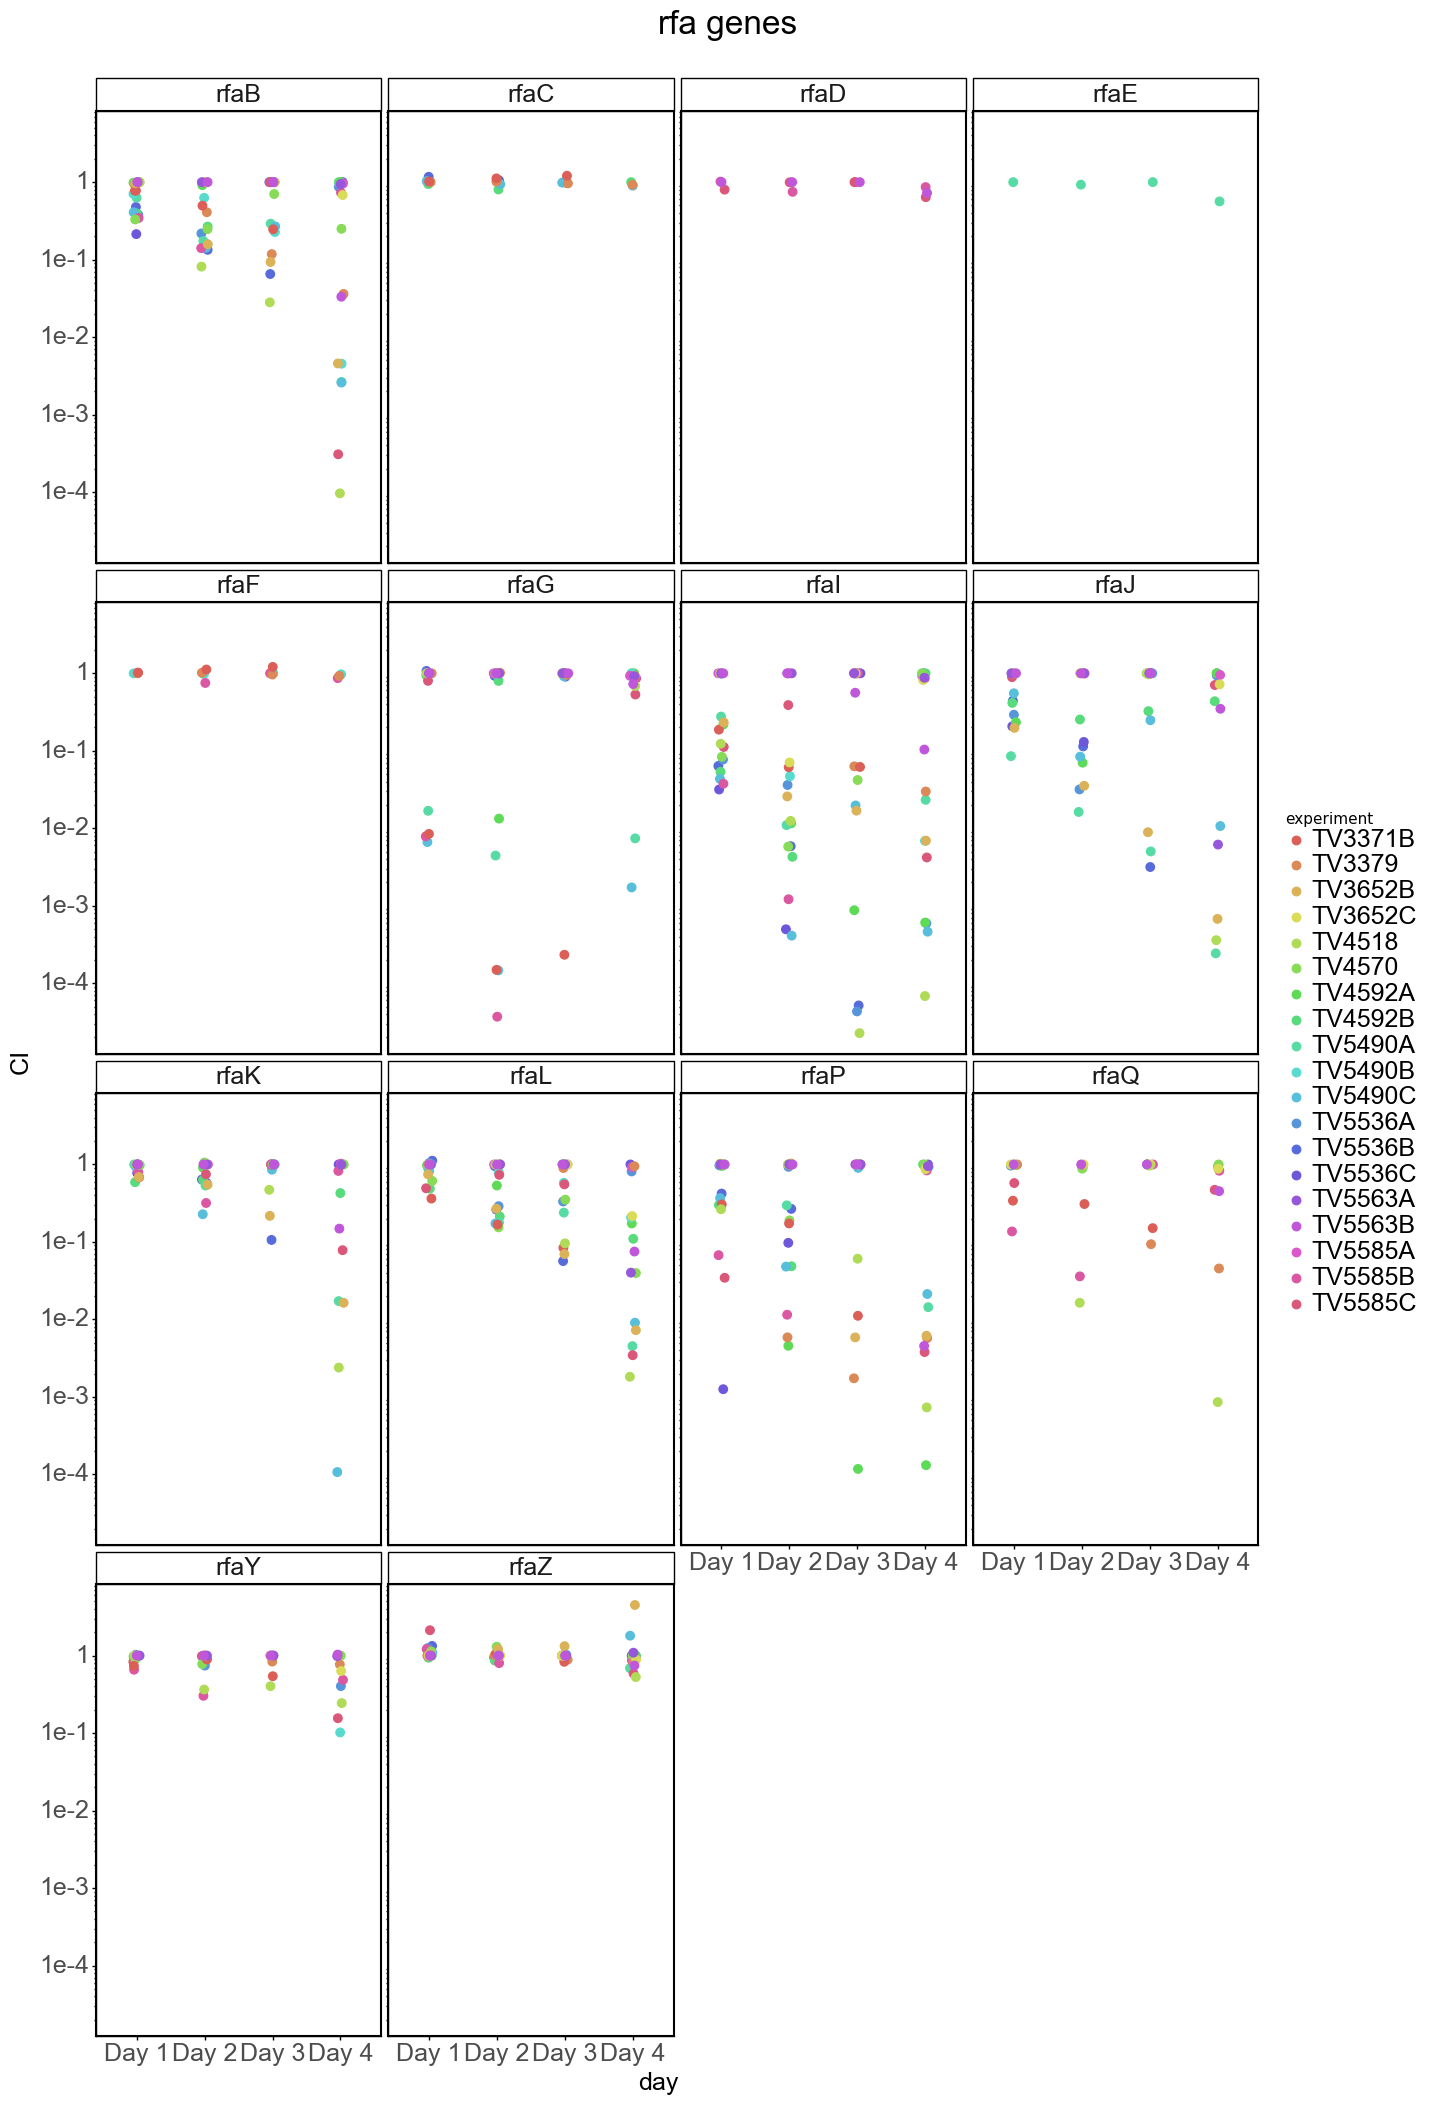

<ggplot: (8791016274573)>

In [50]:
p9.options.figure_size = (15, 25)
p = p9.ggplot(p9.aes(x='day', y='CI', color='experiment'), rfa)
(p + p9.geom_jitter(size=3, height=0, width=0.05) 
+ p9.theme_classic()
+ p9.ggtitle("rfa genes\n")
+ p9.theme(
    plot_title = p9.element_text(family = "Arial", size = 24, hjust = 0), # Title size and font.
    axis_text = p9.element_text(family = "Arial", size = 18), # Size and font of x and y values.
    axis_title = p9.element_text(family = "Arial", size = 18), # Size and font of x and y axes.
    panel_border = p9.element_rect(colour = "black", fill = np.nan, size = 1.5), # Black border around the plot area.
    axis_ticks = p9.element_line(colour = "black", size = 1), # Style of x and y ticks.
    legend_text = p9.element_text(family = "Arial", size = 18),
    strip_text = p9.element_text(family = "Arial", size = 18),
  )
 + p9.scale_y_log10()
+ p9.facet_wrap('~ gene', ncol=4))

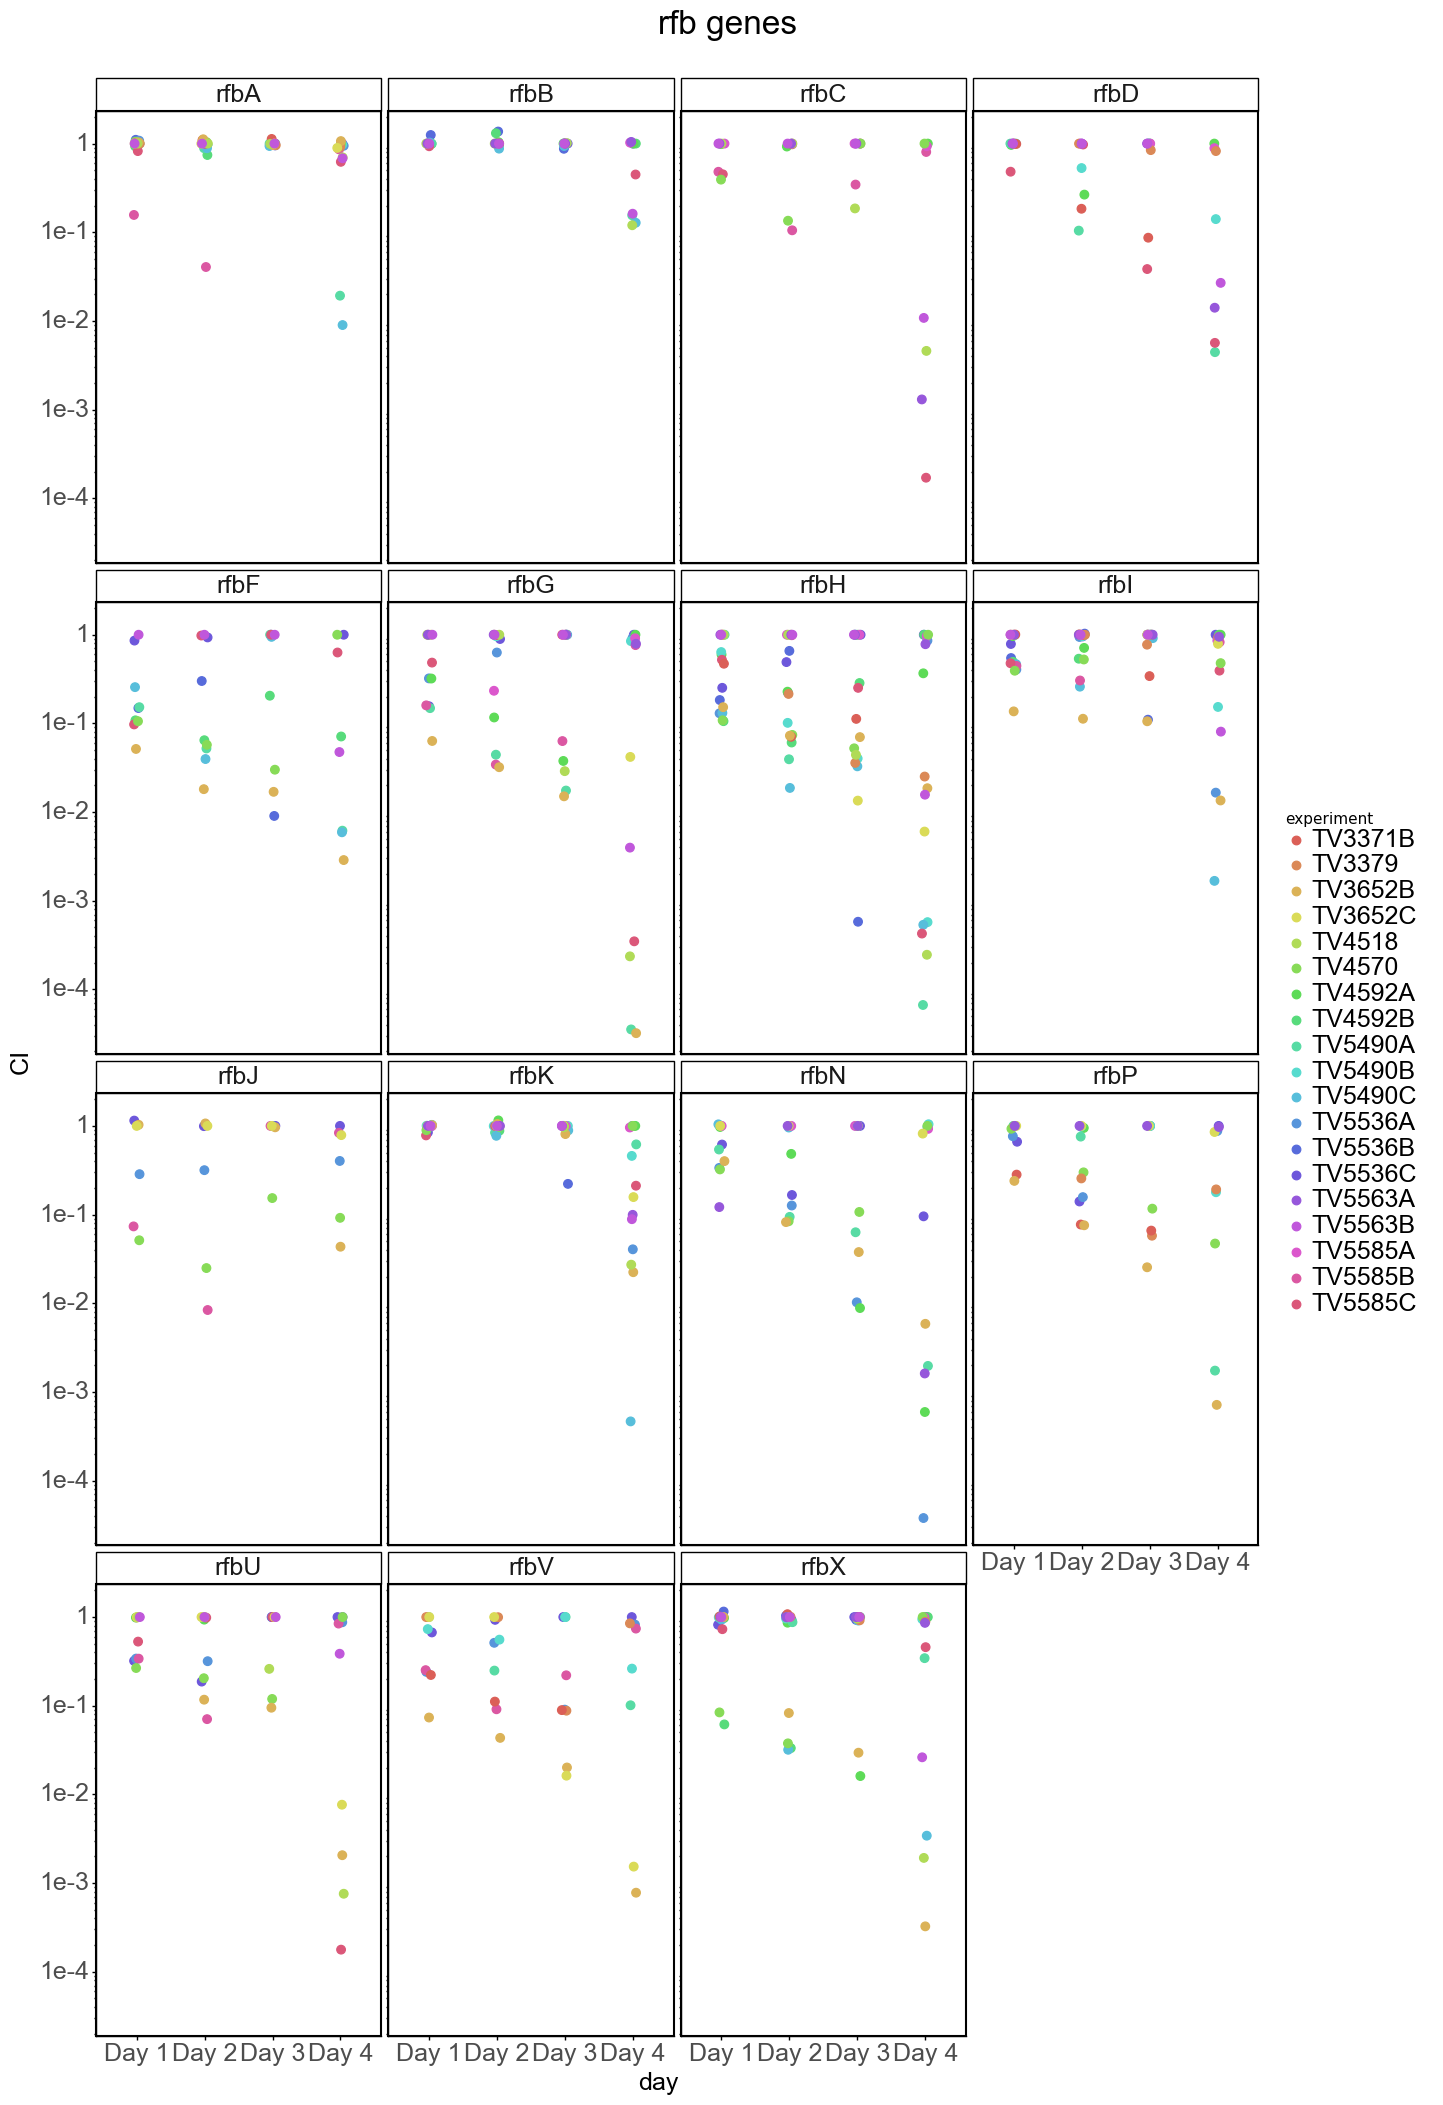

<ggplot: (8791023056655)>

In [51]:
p9.options.figure_size = (15, 25)
p = p9.ggplot(p9.aes(x='day', y='CI', color='experiment'), rfb)
(p + p9.geom_jitter(size=3, height=0, width=0.05) 
+ p9.theme_classic()
+ p9.ggtitle("rfb genes\n")
#+ p9.labs( y = 'Fitness (log2FC)')
+ p9.theme(
    plot_title = p9.element_text(family = "Arial", size = 24, hjust = 0), # Title size and font.
    axis_text = p9.element_text(family = "Arial", size = 18), # Size and font of x and y values.
    axis_title = p9.element_text(family = "Arial", size = 18), # Size and font of x and y axes.
    panel_border = p9.element_rect(colour = "black", fill = np.nan, size = 1.5), # Black border around the plot area.
    axis_ticks = p9.element_line(colour = "black", size = 1), # Style of x and y ticks.
    legend_text = p9.element_text(family = "Arial", size = 18),
    strip_text = p9.element_text(family = "Arial", size = 18),
  )
#+ p9.scale_y_continuous(breaks=[-1.5, -1, -0.5, 0, 0.5, 1, 1.5], limits=[-1.5, 1.5])
 + p9.scale_y_log10()
+ p9.facet_wrap('~ gene', ncol=4))

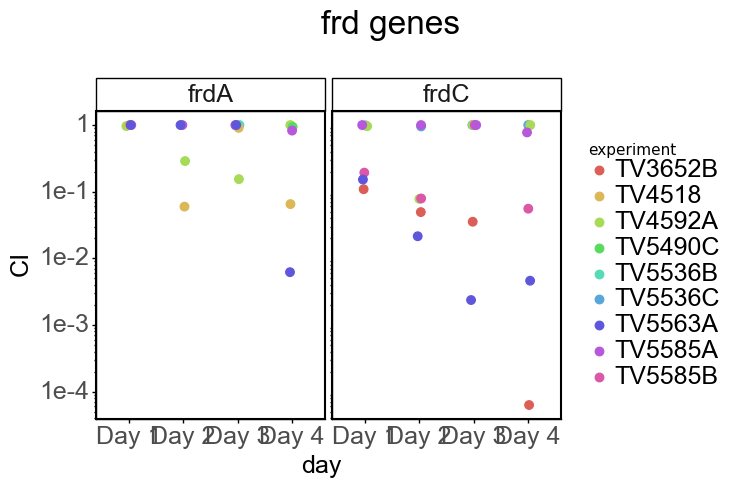

<ggplot: (8791032827645)>

In [55]:
p9.options.figure_size = (6, 4)
p = p9.ggplot(p9.aes(x='day', y='CI', color='experiment'), frd)
(p + p9.geom_jitter(size=3, height=0, width=0.05) 
+ p9.theme_classic()
+ p9.ggtitle("frd genes\n")
#+ p9.labs( y = 'Fitness (log2FC)')
+ p9.theme(
    plot_title = p9.element_text(family = "Arial", size = 24, hjust = 0), # Title size and font.
    axis_text = p9.element_text(family = "Arial", size = 18), # Size and font of x and y values.
    axis_title = p9.element_text(family = "Arial", size = 18), # Size and font of x and y axes.
    panel_border = p9.element_rect(colour = "black", fill = np.nan, size = 1.5), # Black border around the plot area.
    axis_ticks = p9.element_line(colour = "black", size = 1), # Style of x and y ticks.
    legend_text = p9.element_text(family = "Arial", size = 18),
    strip_text = p9.element_text(family = "Arial", size = 18),
  )
#+ p9.scale_y_continuous(breaks=[-1.5, -1, -0.5, 0, 0.5, 1, 1.5], limits=[-1.5, 1.5])
 + p9.scale_y_log10()
+ p9.facet_wrap('~ gene', ncol=4))

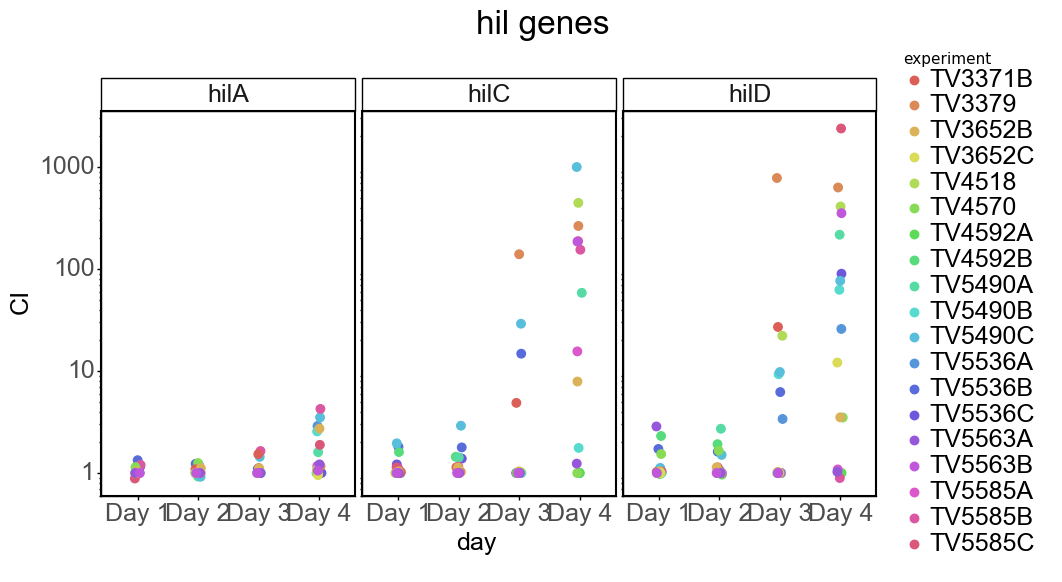

<ggplot: (8791021912040)>

In [56]:
p9.options.figure_size = (10, 5)
p = p9.ggplot(p9.aes(x='day', y='CI', color='experiment'), hil)
(p + p9.geom_jitter(size=3, height=0, width=0.05) 
+ p9.theme_classic()
+ p9.ggtitle("hil genes\n")
#+ p9.labs( y = 'Fitness (log2FC)')
+ p9.theme(
    plot_title = p9.element_text(family = "Arial", size = 24, hjust = 0), # Title size and font.
    axis_text = p9.element_text(family = "Arial", size = 18), # Size and font of x and y values.
    axis_title = p9.element_text(family = "Arial", size = 18), # Size and font of x and y axes.
    panel_border = p9.element_rect(colour = "black", fill = np.nan, size = 1.5), # Black border around the plot area.
    axis_ticks = p9.element_line(colour = "black", size = 1), # Style of x and y ticks.
    legend_text = p9.element_text(family = "Arial", size = 18),
    strip_text = p9.element_text(family = "Arial", size = 18),
  )
#+ p9.scale_y_continuous(breaks=[-1.5, -1, -0.5, 0, 0.5, 1, 1.5], limits=[-1.5, 1.5])
 + p9.scale_y_log10()
+ p9.facet_wrap('~ gene', ncol=4))

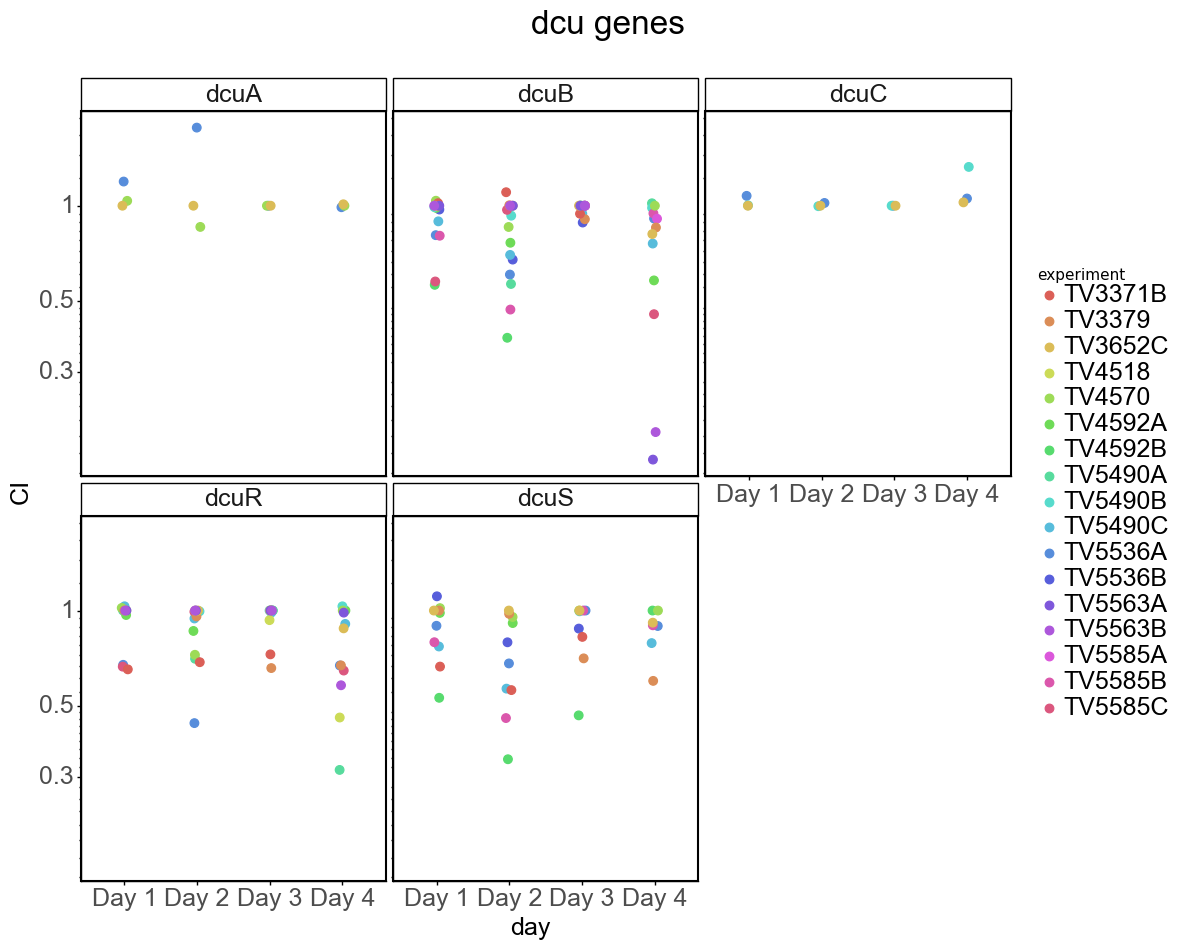

<ggplot: (-9223363245837767571)>

In [57]:
p9.options.figure_size = (12, 10)
p = p9.ggplot(p9.aes(x='day', y='CI', color='experiment'), dcu)
(p + p9.geom_jitter(size=3, height=0, width=0.05) 
+ p9.theme_classic()
+ p9.ggtitle("dcu genes\n")
#+ p9.labs( y = 'Fitness (log2FC)')
+ p9.theme(
    plot_title = p9.element_text(family = "Arial", size = 24, hjust = 0), # Title size and font.
    axis_text = p9.element_text(family = "Arial", size = 18), # Size and font of x and y values.
    axis_title = p9.element_text(family = "Arial", size = 18), # Size and font of x and y axes.
    panel_border = p9.element_rect(colour = "black", fill = np.nan, size = 1.5), # Black border around the plot area.
    axis_ticks = p9.element_line(colour = "black", size = 1), # Style of x and y ticks.
    legend_text = p9.element_text(family = "Arial", size = 18),
    strip_text = p9.element_text(family = "Arial", size = 18),
  )
#+ p9.scale_y_continuous(breaks=[-1.5, -1, -0.5, 0, 0.5, 1, 1.5], limits=[-1.5, 1.5])
 + p9.scale_y_log10()
+ p9.facet_wrap('~ gene', ncol=3))

In [31]:


def summarize_dpi(cnts_df, results_df, dpi='d1'):
    # Get the hits
    genes_only = results_df.dropna(subset=['locus'])
    hits = genes_only[genes_only[f'{dpi}_padj'] < 0.01].gene.values
    # Get the counts
    cnts = cnts_df[cnts_df.ShortName.isin(hits)]
    cnts_sum = cnts.groupby(["ShortName", 'day']).agg({'cnt':['median']}).reset_index()
    cnts_sum.columns = ['gene', 'day', 'cnt_median']
    cnts_sum = cnts_sum[cnts_sum.day.isin(['d0', dpi])]
    cnts_final = cnts_sum[['gene', 'day', 'cnt_median']]
    cnts_final = cnts_final.pivot(index='gene', columns='day').reset_index()
    cnts_final.columns = ['gene', 'inoculum', 'cnt']
    
    #Get num of experiments
    hit_stat = (results_df[results_df['gene'].isin(hits)].groupby('gene')
                   .agg({'experiment':['nunique'], f'{dpi}_padj':[len_sig]}).reset_index())
    hit_stat.columns = ['gene', 'num_exp', 'num_sig']
    tograph = hit_stat.merge(cnts_final, on='gene')
    tograph['phits'] = tograph['num_sig']/tograph['num_exp']
    return tograph

def len_sig(x):
    x = x.drop_duplicates()
    return sum([i < 0.05 for i in x])

In [34]:
dnaids = ['dnaid1315', 'dnaid1428', 'dnaid1429', 'dnaid2015', 'dnaid2016', 'dnaid2017', 'dnaid2018', 'dnaid2019',
         'dnaid2023', 'dnaid2024', 'dnaid2025', 'dnaid2026', 'dnaid2027', 'dnaid2028', 'dnaid2029' ]
cnt_df = load_files(dnaids, Path(root)/counts)

In [35]:
dpi1 = summarize_dpi(cnt_df, fres, dpi='d1')
dpi2 = summarize_dpi(cnt_df, fres, dpi='d2')
dpi3 = summarize_dpi(cnt_df, fres, dpi='d3')
dpi4 = summarize_dpi(cnt_df, fres, dpi='d4')

# Summarizing potential hits

For each DPI this graph shows:

- Each point is a gene that was a hit in at least 1 experiment (adjusted p-values < 0.01)
- The x-axis shows the median count in the inoculum (across all experiments)
- The y-axis shows the mediant count on a specific DPI 
- The size of the circle indicates number of experiments (i.e. inocula) the gene was disrupted in
- The color of the circle indicates the proportion of experiments in which the gene was a hit. For example, small black dot represents a gene that was disrupted only once, and was a hit (i.e. proportion is 1/1). Large white cicrles show genes that were disrupted in multiple experiments, but was identified as a hit only once (i.e. proportion could be 1/15). 
- Genes with proportion of hits > 0.5 are labeled. 



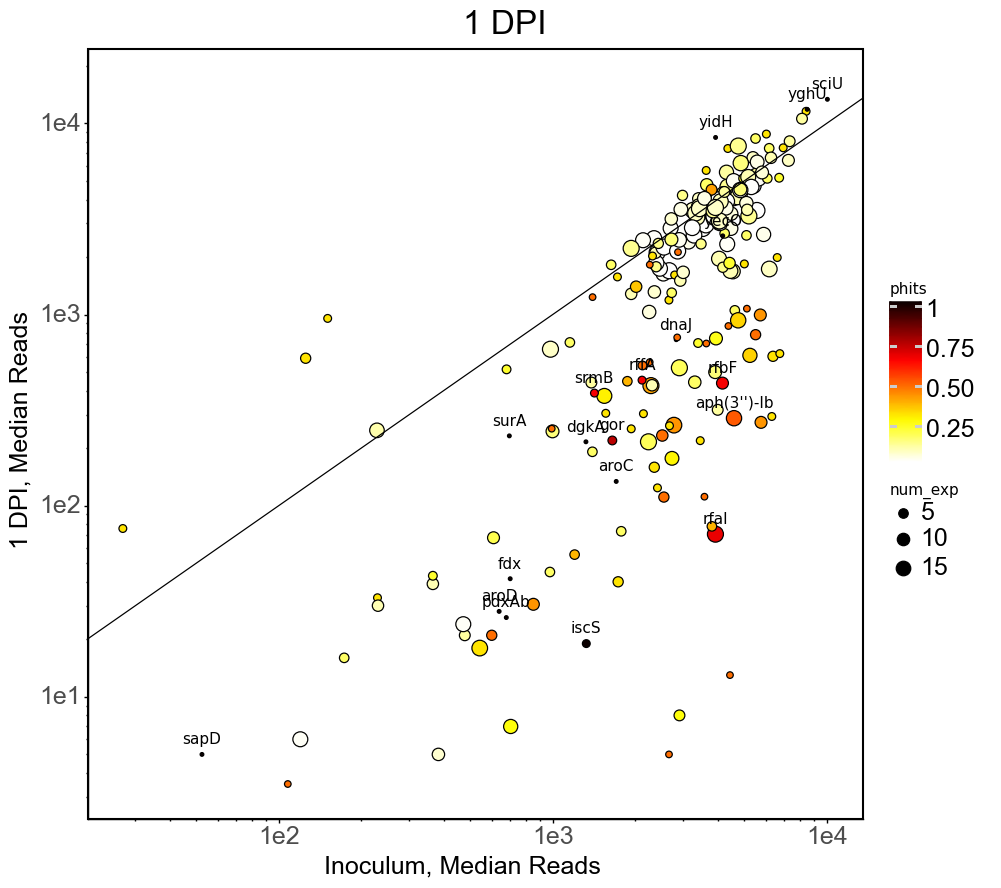

<ggplot: (8791016195192)>

In [58]:
p9.options.figure_size = (10, 10)
p = p9.ggplot(p9.aes(x='inoculum', y='cnt'), dpi1)
(p + p9.geom_point(p9.aes(fill='phits', size='num_exp'))
+p9.scale_y_log10()
 +p9.scale_x_log10()
 +p9.geom_text(p9.aes(x='inoculum', y='cnt', label='gene'),
                  color="black",nudge_y=0.08,
                  data=dpi1[dpi1['phits'] >0.5])
 +p9.theme_classic()
 + p9.theme(
    plot_title = p9.element_text(family = "Arial", size = 24, hjust = 0), # Title size and font.
    axis_text = p9.element_text(family = "Arial", size = 18), # Size and font of x and y values.
    axis_title = p9.element_text(family = "Arial", size = 18), # Size and font of x and y axes.
    panel_border = p9.element_rect(colour = "black", fill = np.nan, size = 1.5), # Black border around the plot area.
    axis_ticks = p9.element_line(colour = "black", size = 1), # Style of x and y ticks.
    legend_text = p9.element_text(family = "Arial", size = 18),
    strip_text = p9.element_text(family = "Arial", size = 18),
  )
 +p9.ggtitle("1 DPI")
 +p9.labs(y ="1 DPI, Median Reads", x= "Inoculum, Median Reads")
 +p9.geom_abline(intercept=0, slope=1)
 
 +p9.scale_fill_continuous('hot_r')
)


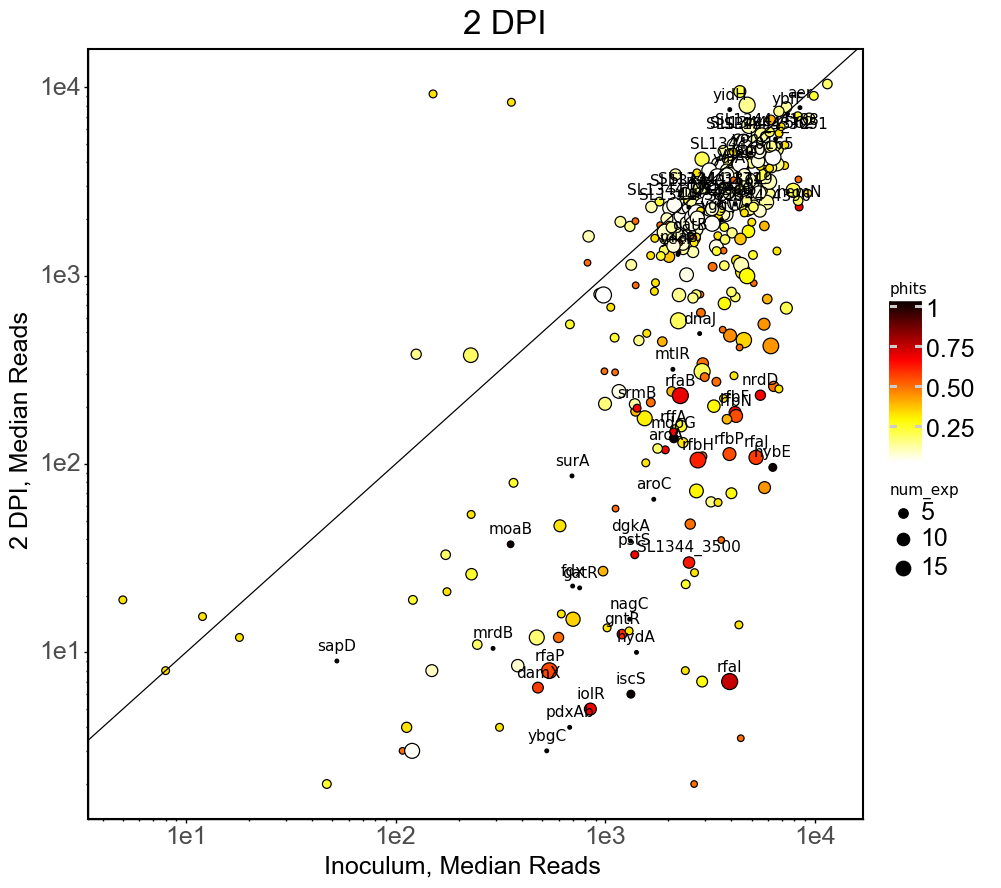

<ggplot: (8791024053701)>

In [59]:

p9.options.figure_size = (10, 10)
p = p9.ggplot(p9.aes(x='inoculum', y='cnt'), dpi2)
(p + p9.geom_point(p9.aes(fill='phits', size='num_exp'))
+p9.scale_y_log10()
 +p9.scale_x_log10()
 +p9.geom_text(p9.aes(x='inoculum', y='cnt', label='gene'),
                  color="black",nudge_y=0.08,
                  data=dpi2[dpi2['phits'] >0.5])
 +p9.theme_classic()
 + p9.theme(
    plot_title = p9.element_text(family = "Arial", size = 24, hjust = 0), # Title size and font.
    axis_text = p9.element_text(family = "Arial", size = 18), # Size and font of x and y values.
    axis_title = p9.element_text(family = "Arial", size = 18), # Size and font of x and y axes.
    panel_border = p9.element_rect(colour = "black", fill = np.nan, size = 1.5), # Black border around the plot area.
    axis_ticks = p9.element_line(colour = "black", size = 1), # Style of x and y ticks.
    legend_text = p9.element_text(family = "Arial", size = 18),
    strip_text = p9.element_text(family = "Arial", size = 18),
  )
 +p9.ggtitle("2 DPI")
 +p9.labs(y ="2 DPI, Median Reads", x= "Inoculum, Median Reads")
 +p9.geom_abline(intercept=0, slope=1)
 
 +p9.scale_fill_continuous('hot_r')
)

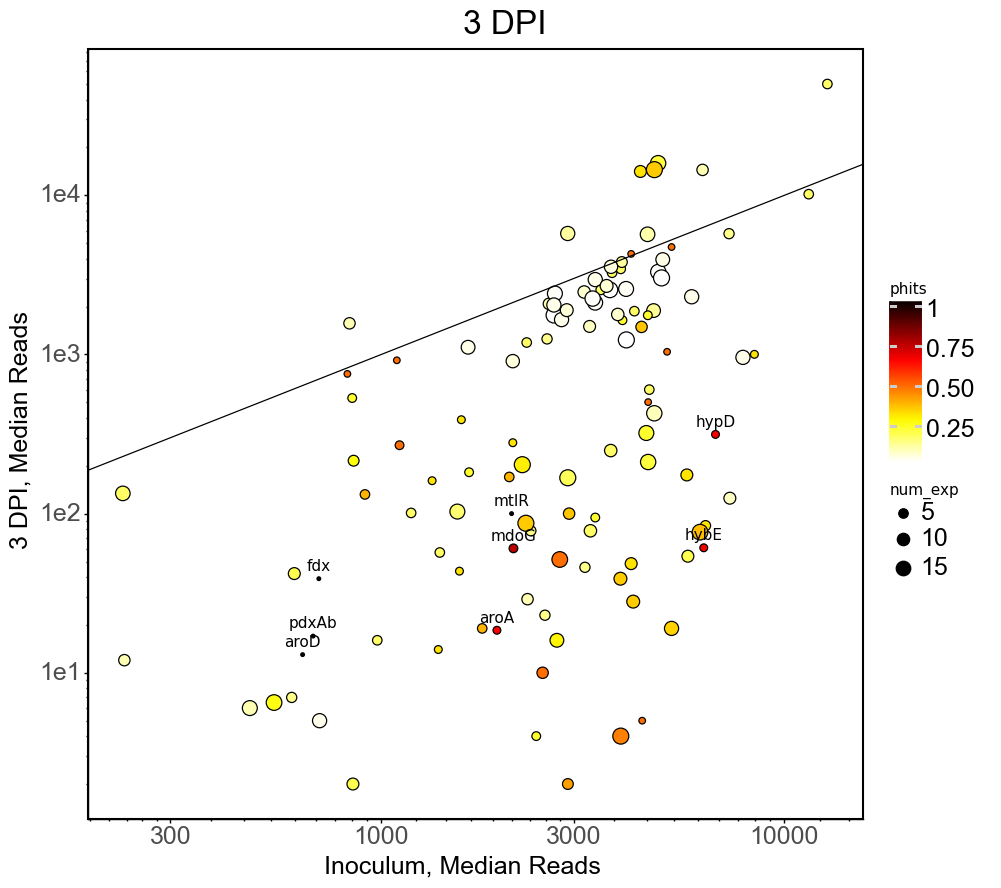

<ggplot: (8791025669366)>

In [60]:
p9.options.figure_size = (10, 10)
p = p9.ggplot(p9.aes(x='inoculum', y='cnt'), dpi3)
(p + p9.geom_point(p9.aes(fill='phits', size='num_exp'))
+p9.scale_y_log10()
 +p9.scale_x_log10()
 +p9.geom_text(p9.aes(x='inoculum', y='cnt', label='gene'),
                  color="black",nudge_y=0.08,
                  data=dpi3[dpi3['phits'] >0.5])
 +p9.theme_classic()
 + p9.theme(
    plot_title = p9.element_text(family = "Arial", size = 24, hjust = 0), # Title size and font.
    axis_text = p9.element_text(family = "Arial", size = 18), # Size and font of x and y values.
    axis_title = p9.element_text(family = "Arial", size = 18), # Size and font of x and y axes.
    panel_border = p9.element_rect(colour = "black", fill = np.nan, size = 1.5), # Black border around the plot area.
    axis_ticks = p9.element_line(colour = "black", size = 1), # Style of x and y ticks.
    legend_text = p9.element_text(family = "Arial", size = 18),
    strip_text = p9.element_text(family = "Arial", size = 18),
  )
 +p9.ggtitle("3 DPI")
 +p9.labs(y ="3 DPI, Median Reads", x= "Inoculum, Median Reads")
 +p9.geom_abline(intercept=0, slope=1)
 
 +p9.scale_fill_continuous('hot_r')
)


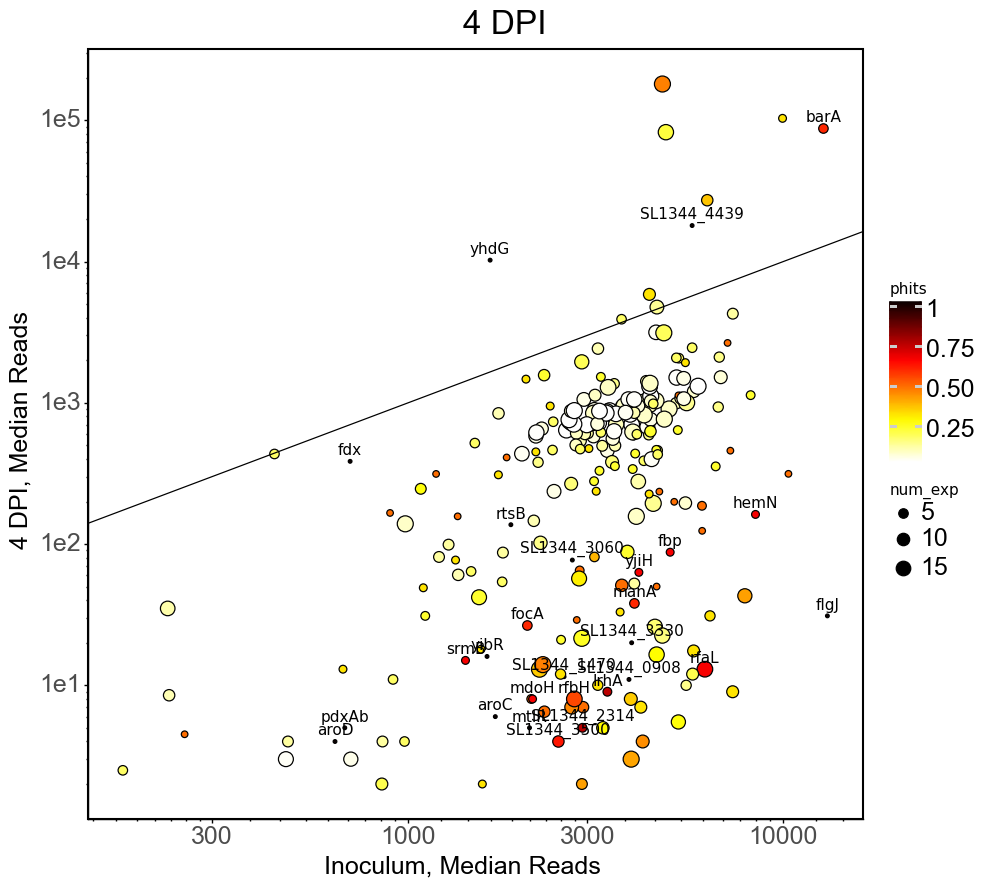

<ggplot: (-9223363245832971474)>

In [61]:
p9.options.figure_size = (10, 10)
p = p9.ggplot(p9.aes(x='inoculum', y='cnt'), dpi4)
(p + p9.geom_point(p9.aes(fill='phits', size='num_exp'))
+p9.scale_y_log10()
 +p9.scale_x_log10()
 +p9.geom_text(p9.aes(x='inoculum', y='cnt', label='gene'),
                  color="black",nudge_y=0.08,
                  data=dpi4[dpi4['phits'] >0.5])
 +p9.theme_classic()
 + p9.theme(
    plot_title = p9.element_text(family = "Arial", size = 24, hjust = 0), # Title size and font.
    axis_text = p9.element_text(family = "Arial", size = 18), # Size and font of x and y values.
    axis_title = p9.element_text(family = "Arial", size = 18), # Size and font of x and y axes.
    panel_border = p9.element_rect(colour = "black", fill = np.nan, size = 1.5), # Black border around the plot area.
    axis_ticks = p9.element_line(colour = "black", size = 1), # Style of x and y ticks.
    legend_text = p9.element_text(family = "Arial", size = 18),
    strip_text = p9.element_text(family = "Arial", size = 18),
  )
 +p9.ggtitle("4 DPI")
 +p9.labs(y ="4 DPI, Median Reads", x= "Inoculum, Median Reads")
 +p9.geom_abline(intercept=0, slope=1)
 
 +p9.scale_fill_continuous('hot_r')
)